# Trabajo de Predicción
El objetivo de este trabajo consiste en aplicar la técnica de Random Forest utilizando un archivo con datos acerca de los clicks recibidos desde un portal metabuscador de hoteles. De esta manera, se podrán predecir si estas búsquedas terminan o no en una reserva consolidada.

# Lectura y Visualización de Datos
Lo primero que se realiza es la lectura de los datos proporcionados. Además, se visualizarán algunos de los datos de los que se compone el archivo, de tal manera que se puedan comprender los mismos.

In [1]:
# Importación del paquete Pandas para la lectura del archivo.
import pandas as pd

In [2]:
# Carga del archivo con los datos.
data = pd.read_csv("./clicks.csv")

In [3]:
# Visualización de los primeros elementos.
data.head(5)

date  remite_id     checkin    checkout  adults  children  hotel_id  \
0  2016-04-01         89  2016-04-18  2016-04-26       2         0    255858   
1  2016-04-01         89  2016-05-27  2016-05-28       2         2     80563   
2  2016-04-01         89  2016-06-18  2016-06-19       2         0    165762   
3  2016-04-01         89  2016-06-18  2016-06-19       2         0    165762   
4  2016-04-01         89  2016-07-13  2016-08-20       2         0       849   

   sale  
0     0  
1     0  
2     0  
3     0  
4     0

In [4]:
print ("Características iniciales: " + str(len(data.columns)))
print ("Elementos totales: " + str(len(data.index)))

Características iniciales: 8
Elementos totales: 158161


In [5]:
# Visualización de los tipos de datos contenidos en el archivo.
data.dtypes

date         object
remite_id     int64
checkin      object
checkout     object
adults        int64
children      int64
hotel_id      int64
sale          int64
dtype: object

In [6]:
# Visualización de las variables junto con el total de los diferentes valores que toma cada una.

caracteristicas = data.columns

for caracteristica in caracteristicas:
    print ("Valores diferentes para la característica '" + caracteristica + "':")
    print (data[caracteristica].value_counts())

    if "sale" != caracteristica:
        print ("\n")

Valores diferentes para la característica 'date':
2016-04-04    25001
2016-04-01    24225
2016-04-05    23563
2016-04-03    23552
2016-04-06    22394
2016-04-07    20342
2016-04-02    19084
Name: date, dtype: int64


Valores diferentes para la característica 'remite_id':
27     126015
130     15892
89      13912
316      1645
317       697
Name: remite_id, dtype: int64


Valores diferentes para la característica 'checkin':
2016-04-24    9026
2016-04-09    4768
2016-04-08    4479
2016-04-10    3882
2016-04-30    3270
2016-04-29    3235
2016-04-22    3122
2016-04-17    2966
2016-04-15    2910
2016-04-23    2689
2016-04-16    2621
2016-04-02    2260
2016-05-01    2235
2016-05-13    2094
2016-08-01    2093
2016-05-14    2061
2016-04-05    1974
2016-04-07    1935
2016-04-03    1761
2016-05-06    1667
2016-07-04    1631
2016-07-18    1607
2016-05-07    1557
2016-08-08    1532
2016-08-15    1501
2016-04-11    1438
2016-04-06    1413
2016-08-22    1388
2016-07-01    1315
2016-05-27    1259
   

Como se puede observar, existe un total de 8 características y 158.161 elementos dentro del archivo proporcionado. Como se describe en el enunciado, las características son las siguientes:

   - date (objeto). Fecha del click (acotado a una semana, como se ve en los resultados anteriores).
   - remite_id (int64). Mercado geográfico del portal.
   - checkin (objeto). Fecha de checkin en la búsqueda.
   - checkout (objeto). Fecha de checkout en la búsqueda.
   - adults (int64). Número de adultos en la búsqueda.
   - children (int64). Número de niños en la búsqueda.
   - hotel_id (int64). Hotel en el que se ha hecho click.
   - sale (int64). Si el click resultó en una reserva (1) o no (0).

Además, no existen datos nulos en el archivo, por lo que no será necesario su tratamiento antes de trabajar con los datos.

In [7]:
# Obtención de datos estadísticos de las variables cuantitativas iniciales.
data.describe().transpose()

count           mean           std   min     25%       50%  \
remite_id  158161.0      47.086842     47.328124  27.0    27.0      27.0   
adults     158161.0       2.016970      0.397708   1.0     2.0       2.0   
children   158161.0       0.469819      0.786577   0.0     0.0       0.0   
hotel_id   158161.0  125089.567295  97022.122353   4.0  4676.0  151728.0   
sale       158161.0       0.019543      0.138425   0.0     0.0       0.0   

                75%       max  
remite_id      27.0     317.0  
adults          2.0       5.0  
children        1.0       4.0  
hotel_id   192149.0  398894.0  
sale            0.0       1.0

# Tratamiento y Graficado de los Datos Iniciales

In [8]:
# Importación de paquetes necesarios para la representación gráfica de los datos.
import matplotlib.pyplot as plt
import seaborn as sb

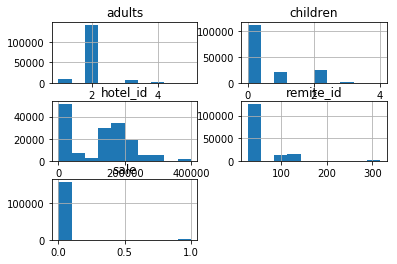

In [9]:
# Visualización de los valores del dataset
data.hist()
plt.show()

Como se puede observar en las gráficas anteriores, y mirando a los resultados de la ejecución de celdas anteriores, se desprenden algunos hechos. El primero, que la fecha de check-in y check-out para la mayoría de los viajes era para ese mismo año, aunque hay una minoría para el año siguiente. La cantidad de adultos mayoritaria en las consultas era de 2. De igual manera, la cantidad de niños en la mayoría de las consultas fue de 0. Por último, únicamente el 1.954% de las búsquedas resultó en una reserva final.

# Predicción
A continuación, se realizarán los pasos necesarios para llevar a cabo una predicción utilizando la técnica de *Random Forest*. Para ello, se han seleccionado las características *remite_id*, *adults*, *children* y *hotel_id*, descartando las relacionadas con las fechas, puesto que no se consideran de relevancia para la consecución del objetivo de predicción.

In [10]:
# Selección de características a utilizar y 'target'
pred_caract = ['remite_id', 'adults', 'children', 'hotel_id']
target = ['sale']

# Extracción de las características que se utilizarán para la predicción.
X = data[pred_caract]

# Extracción de la característica a ser predicha (sale).
y = data[target]

En el caso de que se utilice una separación de los registros de manera aleatoria, se utilizarían las líneas contenidas en las dos siguientes celdas. Aunque se puede definir un *random_state* a la hora de llamar a la función *train_test_split* como semilla para la aleatoriedad de la generación de los diferentes *subsets* (definido a 0 en el ejemplo), de manera que se pueda conseguir un resultado determinista, se ha optado por separar los datos por fechas. Esta decisión ha sido tomada en base a la documentación proporcionada de la asignatura de DSI, donde se recomienda que, siempre y cuando haya una <<dimensión temporal para cortar>>, se realice esta tarea de manera estática.

Por tanto, en lugar de utilizar un 60% para entrenamiento (0.6 x 158161=94.897) y 40% para evaluación (0.4 x 158161=63.264), se utilizarán las fechas de búsqueda de los registros, ya que el tiempo de estas es de una semana. Finalmente, se decide dividir los registros del 2016-04-01 al 2016-04-04 para entrenamiento y del 2016-04-05 al 2016-04-07 para evaluación.

In [11]:
# Importación del paquete necesario para la extracción de las muestras de entrenamiento y test.
from sklearn.model_selection import train_test_split

In [12]:
# Extracción de las muestras de entrenamiento (X_train, y_train) y de prueba (X_test, y_test).
# Se ha establecido un porcentaje del 60% para el entrenamiento y un 40% para evaluar el modelo.

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [13]:
fechas_train = ('2016-04-01', '2016-04-02', '2016-04-03', '2016-04-04')
fechas_test = ('2016-04-05', '2016-04-06', '2016-04-07')

In [14]:
X_train = X.loc[data['date'].isin(fechas_train)]
X_test = X.loc[data['date'].isin(fechas_test)]
y_train = y.loc[data['date'].isin(fechas_train)]
y_test = y.loc[data['date'].isin(fechas_test)]

In [15]:
print (str(X_train.count()) + "\n")
print (y_test.count())

remite_id    91862
adults       91862
children     91862
hotel_id     91862
dtype: int64

sale    66299
dtype: int64


Como se puede observar, aunque la cantidad de registros no es exactamente 60%/40%, el número de estos en cada *dataset* utilizando la separación de fechas se acerca mucho. 

In [16]:
# Importación del paquete necesario para la creación de un modelo usando un clasificador basado en Random Forest.
from sklearn.ensemble import RandomForestClassifier

# Importación de la librería numpy.
import numpy as np

In [17]:
# Creación del modelo.
# Se define 'n_jobs' a -1, de manera que se utilicen todos los núcleos disponibles, así como 'random_state=0'
# para obtener resultados deterministas en cada ejecución.

model = RandomForestClassifier(n_jobs=-1, random_state=0)

# Construcción del modelo
# model.fit(X_train, y_train)

A continuación, se realizarán algunas pruebas de cara a determinar el valor para el número de estimadores y la profundidad máxima que debe alcanzar cada uno de los árboles.

Por defecto, los parámetros utilizados para algunas de los parámetros más importantes son los siguientes:

 - El **criterio de selección** para la creación del modelo es el de ***gini***, que mide la pureza del corte.
 - El **número mínimo de observaciones** requeridas para dividir un nodo (*split size*) es 2.
 - El **número mínimo de observaciones** (*leaf size*) por nodo final es 1.
 
Además, se utilizará el *score* que se obtenga para cada una de las ejecuciones. Este valor representa la precisión media de la predicción realizada en cada paso.

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

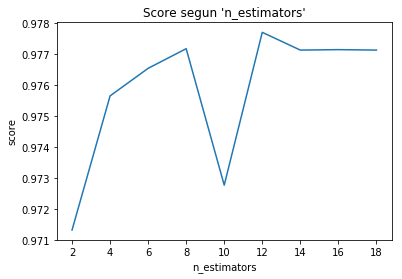

In [18]:
# Probar diferentes cantidades de estimadores (n_estimators)
estimators = np.arange(2, 20, 2)
scores = []

for n in estimators:
    model = RandomForestClassifier(n_jobs=-1, random_state=0)
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.title("Score segun 'n_estimators'")
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.plot(estimators, scores)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

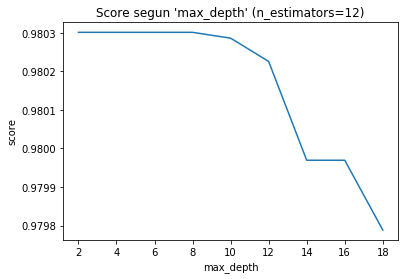

In [19]:
# Probar con diferentes profundidades de árbol.
estimators = np.arange(2, 20, 2)
scores = []

for n in estimators:
    model = RandomForestClassifier(n_jobs=-1, random_state=0)
    model.set_params(max_depth=n, n_estimators=12)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.title("Score segun 'max_depth' (n_estimators=12)")
plt.xlabel("max_depth")
plt.ylabel("score")
plt.plot(estimators, scores)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

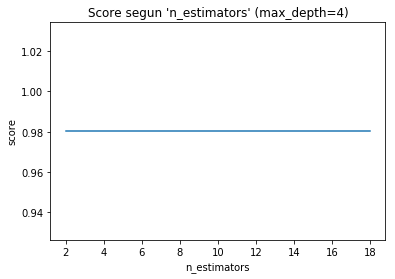

In [20]:
# Probar diferentes cantidades de estimadores (n_estimators)
estimators = np.arange(2, 20, 2)
scores = []

for n in estimators:
    model = RandomForestClassifier(n_jobs=-1, random_state=0)
    model.set_params(n_estimators=n, max_depth=4)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.title("Score segun 'n_estimators' (max_depth=4)")
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.plot(estimators, scores)

Tras observar los gráficos de las pruebas se llega a las siguientes conclusiones (el último gráfico se ha realizado con el fin de unificar los resultados de las pruebas anteriores):

 - En la primera ejecución, el aumento en el **número de estimadores** (por defecto, todos los nodos se expanden al máximo) favorece el *score*, alcanzando un mínimo global en 2 y un mínimo local en 10. El mejor resultado se observa cuando este parámetro se sitúa en el valor 12, mientras que conforme aumenta el número, el *score* tiende a mantenerse constante. Por tanto, será el que se utilizará para la predicción final, puesto que cuanto mayor sea este número, el bosque se encontrará más poblado y la votación para llevar a cabo la decisión será más precisa.
 - En la segunda ejecución, el aumento en la **profundidad máxima** no varía hasta alcanzar una profundidad de 8, desde donde comienza a decrecer. Por tanto, en pos de generar un modelo no demasiado complejo, pero que sea capaz de realizar unas buenas predicciones, se escogerá el valor de 4 (ni demasiada profundidad ni demasiada poca).

In [21]:
# Creación del modelo final
model = RandomForestClassifier(n_jobs=-1, random_state=0)
model.set_params(max_depth=4, n_estimators=12)
model.fit(X_train, y_train)

print("'Score' con 12 estimadores y profundidad de 4: " + str('%.3f'%(model.score(X_test, y_test) * 100)) + "%")

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


'Score' con 12 estimadores y profundidad de 4: 98.030%


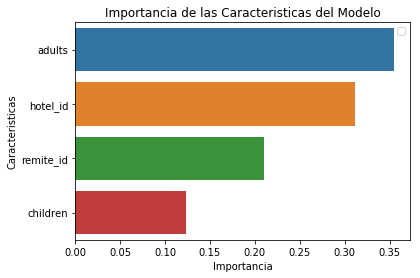

Relevancias de las características:


Características  Random Forests
0       remite_id        0.210487
1          adults        0.354919
2        children        0.123061
3        hotel_id        0.311533

In [22]:
# Gráfico con las importancias de las características del modelo creado.
importancias_caract = pd.Series(model.feature_importances_, index=pred_caract).sort_values(ascending=False)

%matplotlib inline

sb.barplot(x=importancias_caract, y=importancias_caract.index)

plt.xlabel('Importancia')
plt.ylabel('Caracteristicas')
plt.title("Importancia de las Caracteristicas del Modelo")
plt.legend()
plt.show()

# Relevancias de las características.
print ('Relevancias de las características:')
display(pd.DataFrame({'Características': pred_caract, 'Random Forests': model.feature_importances_}))

De acuerdo con los valores de las importancias de las diferentes características utilizadas para la creación del modelo, ***adults*** (número de adultos en la búsqueda) es la que más importancia acapara, seguida de ***hotel_id*** (hotel en el que se ha hecho click), ***remite_id*** (mercado geográfico del portal) y, por último, ***children*** (número de niños en la búsqueda).

## Matriz de Confusión

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
predictions = model.predict(X_test)
confusion_matrix(y_test, predictions)

array([[64993,     0],
       [ 1306,     0]])

## Comprobación Predicciones Modelo Original

A continuación, puesto que cabe la posibilidad de que el modelo tienda a "sobreaprender", se realizarán algunas pruebas con algunas muestras de datos diferentes, de manera que se pueda comprobar (o no) la existencia de este fenómeno.

In [25]:
for prueba in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

    predictions = model.predict(X_test)
    print (confusion_matrix(y_test, predictions))
    print "\n"

[[62042     0]
 [ 1223     0]]


[[62043     0]
 [ 1222     0]]


[[62037     0]
 [ 1228     0]]


[[62039     0]
 [ 1226     0]]


[[62040     0]
 [ 1225     0]]


[[62061     0]
 [ 1204     0]]


[[62020     0]
 [ 1245     0]]


[[62032     0]
 [ 1233     0]]


[[62023     0]
 [ 1242     0]]


[[62051     0]
 [ 1214     0]]




## Reglas Árboles Modelo Original

In [26]:
# https://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree
for tree_idx, est in enumerate(model.estimators_):
    tree = est.tree_
    assert tree.value.shape[1] == 1 # no support for multi-output

    print('TREE: {}'.format(tree_idx))

    iterator = enumerate(zip(tree.children_left, tree.children_right, tree.feature, tree.threshold, tree.value))
    for node_idx, data in iterator:
        left, right, feature, th, value = data

        # left: index of left child (if any)
        # right: index of right child (if any)
        # feature: index of the feature to check
        # th: the threshold to compare against
        # value: values associated with classes            

        # for classifier, value is 0 except the index of the class to return
        class_idx = np.argmax(value[0])

        if left == -1 and right == -1:
            print('{} LEAF: return class={}'.format(node_idx, class_idx))
        else:
            print('{} NODE: if feature[{}] < {} then next={} else next={}'.format(node_idx, feature, th, left, right))
            
    print("\n")

TREE: 0
0 NODE: if feature[0] < 109.5 then next=1 else next=16
1 NODE: if feature[1] < 1.5 then next=2 else next=9
2 NODE: if feature[3] < 1096.0 then next=3 else next=6
3 NODE: if feature[2] < 0.5 then next=4 else next=5
4 LEAF: return class=0
5 LEAF: return class=0
6 NODE: if feature[2] < 0.5 then next=7 else next=8
7 LEAF: return class=0
8 LEAF: return class=0
9 NODE: if feature[3] < 643.5 then next=10 else next=13
10 NODE: if feature[2] < 1.5 then next=11 else next=12
11 LEAF: return class=0
12 LEAF: return class=0
13 NODE: if feature[2] < 0.5 then next=14 else next=15
14 LEAF: return class=0
15 LEAF: return class=0
16 NODE: if feature[1] < 1.5 then next=17 else next=24
17 NODE: if feature[3] < 150960.0 then next=18 else next=21
18 NODE: if feature[3] < 150952.5 then next=19 else next=20
19 LEAF: return class=0
20 LEAF: return class=1
21 NODE: if feature[3] < 315384.0 then next=22 else next=23
22 LEAF: return class=0
23 LEAF: return class=0
24 NODE: if feature[1] < 3.5 then next=25

Tras las pruebas realizadas con diferentes conjuntos de datos, se puede observar que el modelo predice muy bien cuándo no se va a realizar la reserva (0), mientras que parece no predecir el caso contrario (1), realizando siempre predicciones con un mismo y único resultado. Esto puede deberse a que la cantidad de estos casos, como se ha mencionado anteriormente, es muy pequeña, no alcanzando el 2% del total de las muestras, lo que podría ser insuficiente para el modelo propuesto. Por último, se han extraído las reglas de los árboles que conforman dicho modelo.

No obstante, a continuación se van a realizar otros modelos para llevar a cabo algunas pruebas más, de cara a mejorar el resultado de las predicciones de reservas ya sea balanceando las características, extrayendo nuevas características, etc.

# Prueba Modelo 2 (Balanceo)

Esta prueba estará basada en la anterior aunque, esta vez, realizando un balanceo de las características a la hora de generar el modelo, puesto que existe una gran diferencia en cuanto a la cantidad de muestras de cada clase a predecir. De igual manera, se realizará el estudio de la cantidad de estimadores y profundidad de los árboles, utilizando las mismas características para la construcción del modelo.

In [27]:
data = pd.read_csv("./clicks.csv")

# Selección de características a utilizar y 'target'
pred_caract = ['remite_id', 'adults', 'children', 'hotel_id']
target = ['sale']

# Extracción de las características que se utilizarán para la predicción.
X = data[pred_caract]

# Extracción de la característica a ser predicha (sale).
y = data[target]

In [28]:
fechas_train = ('2016-04-01', '2016-04-02', '2016-04-03', '2016-04-04')
fechas_test = ('2016-04-05', '2016-04-06', '2016-04-07')

In [29]:
X_train = X.loc[data['date'].isin(fechas_train)]
X_test = X.loc[data['date'].isin(fechas_test)]
y_train = y.loc[data['date'].isin(fechas_train)]
y_test = y.loc[data['date'].isin(fechas_test)]

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

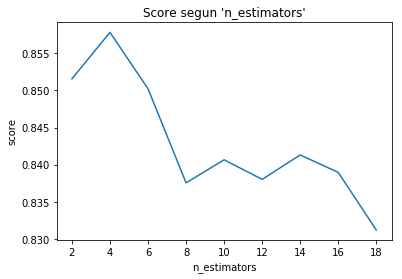

In [30]:
# Probar diferentes cantidades de estimadores (n_estimators)
estimators = np.arange(2, 20, 2)
scores = []

for n in estimators:
    model = RandomForestClassifier(n_jobs=-1, random_state=0, class_weight='balanced')
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.title("Score segun 'n_estimators'")
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.plot(estimators, scores)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

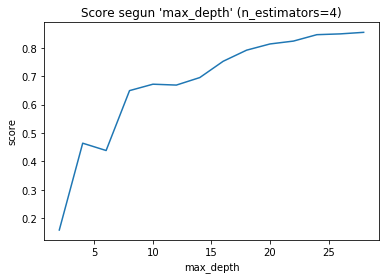

In [31]:
# Probar con diferentes profundidades de árbol.
estimators = np.arange(2, 30, 2)
scores = []

for n in estimators:
    model = RandomForestClassifier(n_jobs=-1, random_state=0, class_weight='balanced')
    model.set_params(max_depth=n, n_estimators=4)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.title("Score segun 'max_depth' (n_estimators=4)")
plt.xlabel("max_depth")
plt.ylabel("score")
plt.plot(estimators, scores)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

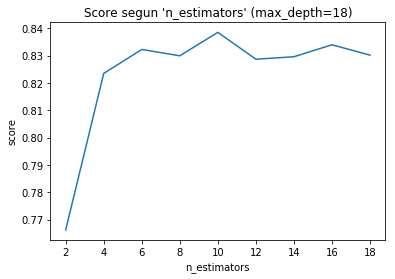

In [32]:
# Probar con diferentes profundidades de árbol.
estimators = np.arange(2, 20, 2)
scores = []

for n in estimators:
    model = RandomForestClassifier(n_jobs=-1, random_state=0, class_weight='balanced')
    model.set_params(max_depth=22, n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.title("Score segun 'n_estimators' (max_depth=18)")
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.plot(estimators, scores)

Según los resultados obtenidos con el balanceo, se extrae una mejor predicción cuando la cantidad de estimadores (**n_estimators**) es de 10, mientras que la profundidad máxima (**max_depth**) es de 22.

In [33]:
# Creación del modelo final
model = RandomForestClassifier(n_jobs=-1, random_state=0, class_weight='balanced')
model.set_params(max_depth=122, n_estimators=10)
model.fit(X_train, y_train)

print("'Score' con 12 estimadores y profundidad de 18: " + str('%.3f'%(model.score(X_test, y_test) * 100)) + "%")

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


'Score' con 12 estimadores y profundidad de 18: 84.066%


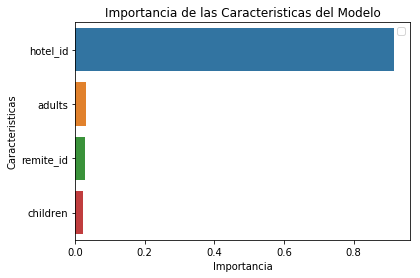

Relevancias de las características:


Características  Random Forests
0       remite_id        0.029517
1          adults        0.030907
2        children        0.023463
3        hotel_id        0.916112

In [34]:
# Gráfico con las importancias de las características del modelo creado.
importancias_caract = pd.Series(model.feature_importances_, index=pred_caract).sort_values(ascending=False)

%matplotlib inline

sb.barplot(x=importancias_caract, y=importancias_caract.index)

plt.xlabel('Importancia')
plt.ylabel('Caracteristicas')
plt.title("Importancia de las Caracteristicas del Modelo")
plt.legend()
plt.show()

# Relevancias de las características.
print ('Relevancias de las características:')
display(pd.DataFrame({'Características': pred_caract, 'Random Forests': model.feature_importances_}))

## Matriz de Confusión

In [35]:
predictions = model.predict(X_test)
confusion_matrix(y_test, predictions)

array([[55459,  9534],
       [ 1030,   276]])

## Comprobación Predicciones Modelo 2

In [36]:
for prueba in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

    predictions = model.predict(X_test)
    print (confusion_matrix(y_test, predictions))
    print "\n"

[[52739  9317]
 [  630   579]]


[[52416  9611]
 [  629   609]]


[[52505  9465]
 [  670   625]]


[[52531  9469]
 [  637   628]]


[[52464  9549]
 [  644   608]]


[[52543  9520]
 [  615   587]]


[[52438  9564]
 [  663   600]]


[[52418  9543]
 [  675   629]]


[[52458  9562]
 [  655   590]]


[[52502  9496]
 [  624   643]]




## Reglas Árboles Modelo 2

In [37]:
# https://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree
for tree_idx, est in enumerate(model.estimators_):
    tree = est.tree_
    assert tree.value.shape[1] == 1 # no support for multi-output

    print('TREE: {}'.format(tree_idx))

    iterator = enumerate(zip(tree.children_left, tree.children_right, tree.feature, tree.threshold, tree.value))
    for node_idx, data in iterator:
        left, right, feature, th, value = data

        # left: index of left child (if any)
        # right: index of right child (if any)
        # feature: index of the feature to check
        # th: the threshold to compare against
        # value: values associated with classes            

        # for classifier, value is 0 except the index of the class to return
        class_idx = np.argmax(value[0])

        if left == -1 and right == -1:
            print('{} LEAF: return class={}'.format(node_idx, class_idx))
        else:
            print('{} NODE: if feature[{}] < {} then next={} else next={}'.format(node_idx, feature, th, left, right))
            
    print("\n")

TREE: 0
0 NODE: if feature[0] < 109.5 then next=1 else next=3152
1 NODE: if feature[1] < 1.5 then next=2 else next=389
2 NODE: if feature[3] < 482.0 then next=3 else next=4
3 LEAF: return class=0
4 NODE: if feature[2] < 0.5 then next=5 else next=340
5 NODE: if feature[0] < 58.0 then next=6 else next=287
6 NODE: if feature[3] < 3476.0 then next=7 else next=72
7 NODE: if feature[3] < 1747.0 then next=8 else next=19
8 NODE: if feature[3] < 1386.0 then next=9 else next=18
9 NODE: if feature[3] < 1285.0 then next=10 else next=13
10 NODE: if feature[3] < 499.5 then next=11 else next=12
11 LEAF: return class=1
12 LEAF: return class=0
13 NODE: if feature[3] < 1323.0 then next=14 else next=17
14 NODE: if feature[3] < 1313.0 then next=15 else next=16
15 LEAF: return class=1
16 LEAF: return class=0
17 LEAF: return class=1
18 LEAF: return class=0
19 NODE: if feature[3] < 1770.5 then next=20 else next=21
20 LEAF: return class=1
21 NODE: if feature[3] < 2671.5 then next=22 else next=41
22 NODE: if f

797 LEAF: return class=0
798 NODE: if feature[3] < 4574.5 then next=799 else next=864
799 NODE: if feature[3] < 4572.5 then next=800 else next=863
800 NODE: if feature[3] < 4114.5 then next=801 else next=808
801 NODE: if feature[3] < 4097.0 then next=802 else next=803
802 LEAF: return class=1
803 NODE: if feature[3] < 4100.5 then next=804 else next=805
804 LEAF: return class=1
805 NODE: if feature[3] < 4105.5 then next=806 else next=807
806 LEAF: return class=0
807 LEAF: return class=1
808 NODE: if feature[3] < 4268.0 then next=809 else next=822
809 NODE: if feature[3] < 4220.5 then next=810 else next=821
810 NODE: if feature[3] < 4180.0 then next=811 else next=812
811 LEAF: return class=0
812 NODE: if feature[3] < 4192.5 then next=813 else next=814
813 LEAF: return class=1
814 NODE: if feature[3] < 4214.5 then next=815 else next=816
815 LEAF: return class=0
816 NODE: if feature[3] < 4215.5 then next=817 else next=818
817 LEAF: return class=1
818 NODE: if feature[3] < 4218.5 then next=

1755 NODE: if feature[3] < 157712.5 then next=1756 else next=1757
1756 LEAF: return class=0
1757 LEAF: return class=1
1758 LEAF: return class=0
1759 NODE: if feature[3] < 206020.0 then next=1760 else next=1781
1760 NODE: if feature[3] < 205784.0 then next=1761 else next=1780
1761 NODE: if feature[3] < 191325.0 then next=1762 else next=1771
1762 NODE: if feature[3] < 190625.0 then next=1763 else next=1770
1763 NODE: if feature[3] < 189235.5 then next=1764 else next=1769
1764 NODE: if feature[3] < 189175.5 then next=1765 else next=1768
1765 NODE: if feature[3] < 186981.5 then next=1766 else next=1767
1766 LEAF: return class=1
1767 LEAF: return class=0
1768 LEAF: return class=1
1769 LEAF: return class=0
1770 LEAF: return class=1
1771 NODE: if feature[3] < 196063.0 then next=1772 else next=1773
1772 LEAF: return class=0
1773 NODE: if feature[3] < 197465.0 then next=1774 else next=1779
1774 NODE: if feature[3] < 197260.5 then next=1775 else next=1778
1775 NODE: if feature[3] < 196428.5 then

2821 LEAF: return class=1
2822 LEAF: return class=0
2823 LEAF: return class=1
2824 LEAF: return class=0
2825 NODE: if feature[3] < 160608.5 then next=2826 else next=2831
2826 NODE: if feature[3] < 157910.0 then next=2827 else next=2828
2827 LEAF: return class=1
2828 NODE: if feature[3] < 159857.0 then next=2829 else next=2830
2829 LEAF: return class=0
2830 LEAF: return class=1
2831 LEAF: return class=0
2832 NODE: if feature[2] < 1.5 then next=2833 else next=2834
2833 LEAF: return class=0
2834 LEAF: return class=1
2835 LEAF: return class=0
2836 NODE: if feature[2] < 1.5 then next=2837 else next=2844
2837 NODE: if feature[3] < 164510.0 then next=2838 else next=2843
2838 NODE: if feature[3] < 164024.5 then next=2839 else next=2840
2839 LEAF: return class=1
2840 NODE: if feature[3] < 164332.0 then next=2841 else next=2842
2841 LEAF: return class=0
2842 LEAF: return class=1
2843 LEAF: return class=0
2844 NODE: if feature[3] < 164852.5 then next=2845 else next=2846
2845 LEAF: return class=0


3005 LEAF: return class=1
3006 LEAF: return class=0
3007 LEAF: return class=0
3008 NODE: if feature[1] < 3.5 then next=3009 else next=3010
3009 LEAF: return class=0
3010 NODE: if feature[3] < 203141.5 then next=3011 else next=3012
3011 LEAF: return class=0
3012 NODE: if feature[3] < 203655.0 then next=3013 else next=3014
3013 LEAF: return class=1
3014 LEAF: return class=0
3015 NODE: if feature[3] < 219364.5 then next=3016 else next=3039
3016 NODE: if feature[1] < 2.5 then next=3017 else next=3038
3017 NODE: if feature[2] < 2.5 then next=3018 else next=3037
3018 NODE: if feature[3] < 219178.5 then next=3019 else next=3028
3019 NODE: if feature[3] < 215703.0 then next=3020 else next=3023
3020 NODE: if feature[2] < 1.5 then next=3021 else next=3022
3021 LEAF: return class=1
3022 LEAF: return class=1
3023 NODE: if feature[3] < 216291.5 then next=3024 else next=3025
3024 LEAF: return class=0
3025 NODE: if feature[3] < 216520.0 then next=3026 else next=3027
3026 LEAF: return class=1
3027 LEA

201 NODE: if feature[3] < 4578.0 then next=202 else next=203
202 LEAF: return class=0
203 NODE: if feature[3] < 4587.0 then next=204 else next=205
204 LEAF: return class=1
205 NODE: if feature[3] < 4592.5 then next=206 else next=207
206 LEAF: return class=0
207 LEAF: return class=1
208 LEAF: return class=0
209 NODE: if feature[3] < 1096.0 then next=210 else next=211
210 LEAF: return class=0
211 NODE: if feature[3] < 1117.5 then next=212 else next=213
212 LEAF: return class=1
213 LEAF: return class=0
214 NODE: if feature[3] < 1662.5 then next=215 else next=216
215 LEAF: return class=0
216 NODE: if feature[3] < 1752.5 then next=217 else next=218
217 LEAF: return class=1
218 NODE: if feature[3] < 4145.5 then next=219 else next=220
219 LEAF: return class=0
220 NODE: if feature[3] < 4516.0 then next=221 else next=224
221 NODE: if feature[3] < 4218.5 then next=222 else next=223
222 LEAF: return class=1
223 LEAF: return class=0
224 LEAF: return class=1
225 NODE: if feature[1] < 3.5 then next=

1048 LEAF: return class=0
1049 NODE: if feature[3] < 150870.0 then next=1050 else next=1053
1050 NODE: if feature[3] < 150849.0 then next=1051 else next=1052
1051 LEAF: return class=1
1052 LEAF: return class=0
1053 LEAF: return class=1
1054 NODE: if feature[3] < 154209.5 then next=1055 else next=1056
1055 LEAF: return class=0
1056 NODE: if feature[3] < 154571.5 then next=1057 else next=1062
1057 NODE: if feature[3] < 154517.5 then next=1058 else next=1061
1058 NODE: if feature[3] < 154244.5 then next=1059 else next=1060
1059 LEAF: return class=1
1060 LEAF: return class=0
1061 LEAF: return class=1
1062 NODE: if feature[3] < 154982.0 then next=1063 else next=1064
1063 LEAF: return class=0
1064 NODE: if feature[3] < 156404.5 then next=1065 else next=1070
1065 NODE: if feature[3] < 156033.5 then next=1066 else next=1069
1066 NODE: if feature[3] < 155243.0 then next=1067 else next=1068
1067 LEAF: return class=1
1068 LEAF: return class=0
1069 LEAF: return class=1
1070 NODE: if feature[3] < 1

2122 LEAF: return class=0
2123 NODE: if feature[2] < 0.5 then next=2124 else next=2125
2124 LEAF: return class=1
2125 LEAF: return class=0
2126 NODE: if feature[3] < 42724.0 then next=2127 else next=2130
2127 NODE: if feature[3] < 23560.5 then next=2128 else next=2129
2128 LEAF: return class=0
2129 LEAF: return class=1
2130 LEAF: return class=0
2131 NODE: if feature[2] < 0.5 then next=2132 else next=2145
2132 NODE: if feature[1] < 3.5 then next=2133 else next=2144
2133 NODE: if feature[0] < 58.0 then next=2134 else next=2143
2134 NODE: if feature[3] < 151617.0 then next=2135 else next=2136
2135 LEAF: return class=0
2136 NODE: if feature[3] < 151890.5 then next=2137 else next=2142
2137 NODE: if feature[3] < 151876.5 then next=2138 else next=2141
2138 NODE: if feature[3] < 151620.5 then next=2139 else next=2140
2139 LEAF: return class=1
2140 LEAF: return class=0
2141 LEAF: return class=1
2142 LEAF: return class=0
2143 LEAF: return class=0
2144 LEAF: return class=0
2145 NODE: if feature[1

2988 NODE: if feature[2] < 2.5 then next=2989 else next=2994
2989 NODE: if feature[3] < 219689.5 then next=2990 else next=2993
2990 NODE: if feature[1] < 2.5 then next=2991 else next=2992
2991 LEAF: return class=0
2992 LEAF: return class=0
2993 LEAF: return class=0
2994 LEAF: return class=0
2995 NODE: if feature[3] < 220661.0 then next=2996 else next=3003
2996 NODE: if feature[2] < 0.5 then next=2997 else next=3002
2997 NODE: if feature[3] < 220624.0 then next=2998 else next=3001
2998 NODE: if feature[3] < 220601.5 then next=2999 else next=3000
2999 LEAF: return class=1
3000 LEAF: return class=0
3001 LEAF: return class=1
3002 LEAF: return class=0
3003 NODE: if feature[3] < 224046.5 then next=3004 else next=3043
3004 NODE: if feature[3] < 221582.5 then next=3005 else next=3018
3005 NODE: if feature[3] < 220914.5 then next=3006 else next=3007
3006 LEAF: return class=0
3007 NODE: if feature[0] < 58.0 then next=3008 else next=3017
3008 NODE: if feature[1] < 3.5 then next=3009 else next=301

191 LEAF: return class=0
192 LEAF: return class=1
193 LEAF: return class=0
194 NODE: if feature[3] < 156033.5 then next=195 else next=202
195 NODE: if feature[3] < 155243.0 then next=196 else next=201
196 NODE: if feature[3] < 155049.0 then next=197 else next=200
197 NODE: if feature[3] < 154762.5 then next=198 else next=199
198 LEAF: return class=1
199 LEAF: return class=0
200 LEAF: return class=1
201 LEAF: return class=0
202 NODE: if feature[3] < 156404.5 then next=203 else next=204
203 LEAF: return class=1
204 NODE: if feature[3] < 156546.5 then next=205 else next=206
205 LEAF: return class=0
206 LEAF: return class=1
207 LEAF: return class=0
208 LEAF: return class=1
209 LEAF: return class=0
210 NODE: if feature[3] < 165584.0 then next=211 else next=212
211 LEAF: return class=1
212 NODE: if feature[3] < 166870.0 then next=213 else next=214
213 LEAF: return class=0
214 LEAF: return class=1
215 LEAF: return class=0
216 LEAF: return class=1
217 LEAF: return class=0
218 NODE: if feature[

1067 NODE: if feature[3] < 6262.0 then next=1068 else next=1069
1068 LEAF: return class=0
1069 NODE: if feature[3] < 6980.0 then next=1070 else next=1079
1070 NODE: if feature[3] < 6415.5 then next=1071 else next=1072
1071 LEAF: return class=1
1072 NODE: if feature[3] < 6663.0 then next=1073 else next=1074
1073 LEAF: return class=0
1074 NODE: if feature[3] < 6790.0 then next=1075 else next=1076
1075 LEAF: return class=1
1076 NODE: if feature[3] < 6897.0 then next=1077 else next=1078
1077 LEAF: return class=0
1078 LEAF: return class=0
1079 LEAF: return class=0
1080 NODE: if feature[3] < 7823.5 then next=1081 else next=1092
1081 NODE: if feature[3] < 7817.5 then next=1082 else next=1089
1082 NODE: if feature[3] < 7666.5 then next=1083 else next=1088
1083 NODE: if feature[3] < 7662.5 then next=1084 else next=1087
1084 NODE: if feature[3] < 7545.0 then next=1085 else next=1086
1085 LEAF: return class=1
1086 LEAF: return class=0
1087 LEAF: return class=1
1088 LEAF: return class=0
1089 NODE:

1983 NODE: if feature[3] < 281347.5 then next=1984 else next=1985
1984 LEAF: return class=0
1985 LEAF: return class=0
1986 LEAF: return class=0
1987 LEAF: return class=0
1988 LEAF: return class=1
1989 LEAF: return class=0
1990 NODE: if feature[3] < 294300.5 then next=1991 else next=2002
1991 NODE: if feature[3] < 293196.5 then next=1992 else next=1995
1992 NODE: if feature[3] < 291311.0 then next=1993 else next=1994
1993 LEAF: return class=1
1994 LEAF: return class=0
1995 NODE: if feature[3] < 293592.0 then next=1996 else next=1999
1996 NODE: if feature[3] < 293351.5 then next=1997 else next=1998
1997 LEAF: return class=1
1998 LEAF: return class=1
1999 NODE: if feature[3] < 294012.5 then next=2000 else next=2001
2000 LEAF: return class=0
2001 LEAF: return class=1
2002 NODE: if feature[3] < 299654.0 then next=2003 else next=2020
2003 NODE: if feature[3] < 299210.5 then next=2004 else next=2019
2004 NODE: if feature[3] < 299050.0 then next=2005 else next=2014
2005 NODE: if feature[3] < 2

2702 NODE: if feature[3] < 206259.0 then next=2703 else next=2704
2703 LEAF: return class=1
2704 NODE: if feature[3] < 206392.5 then next=2705 else next=2706
2705 LEAF: return class=0
2706 LEAF: return class=1
2707 NODE: if feature[3] < 215610.0 then next=2708 else next=2709
2708 LEAF: return class=0
2709 NODE: if feature[3] < 216061.0 then next=2710 else next=2715
2710 NODE: if feature[3] < 215902.0 then next=2711 else next=2714
2711 NODE: if feature[3] < 215703.0 then next=2712 else next=2713
2712 LEAF: return class=1
2713 LEAF: return class=0
2714 LEAF: return class=1
2715 NODE: if feature[3] < 224029.0 then next=2716 else next=2725
2716 NODE: if feature[3] < 219689.5 then next=2717 else next=2724
2717 NODE: if feature[3] < 218953.5 then next=2718 else next=2719
2718 LEAF: return class=0
2719 NODE: if feature[3] < 219334.5 then next=2720 else next=2721
2720 LEAF: return class=1
2721 NODE: if feature[3] < 219679.5 then next=2722 else next=2723
2722 LEAF: return class=0
2723 LEAF: ret

3473 LEAF: return class=0
3474 LEAF: return class=0
3475 LEAF: return class=0
3476 LEAF: return class=0
3477 LEAF: return class=0
3478 NODE: if feature[0] < 223.0 then next=3479 else next=3564
3479 NODE: if feature[3] < 376982.5 then next=3480 else next=3551
3480 NODE: if feature[1] < 2.5 then next=3481 else next=3550
3481 NODE: if feature[3] < 368008.5 then next=3482 else next=3541
3482 NODE: if feature[3] < 268423.5 then next=3483 else next=3494
3483 NODE: if feature[2] < 0.5 then next=3484 else next=3493
3484 NODE: if feature[3] < 268244.5 then next=3485 else next=3492
3485 NODE: if feature[3] < 261470.5 then next=3486 else next=3491
3486 NODE: if feature[3] < 260937.0 then next=3487 else next=3490
3487 NODE: if feature[3] < 259919.0 then next=3488 else next=3489
3488 LEAF: return class=1
3489 LEAF: return class=0
3490 LEAF: return class=1
3491 LEAF: return class=0
3492 LEAF: return class=1
3493 LEAF: return class=0
3494 NODE: if feature[3] < 288506.0 then next=3495 else next=3496
3

783 LEAF: return class=0
784 NODE: if feature[3] < 2555.0 then next=785 else next=790
785 NODE: if feature[3] < 2520.5 then next=786 else next=787
786 LEAF: return class=1
787 NODE: if feature[3] < 2548.0 then next=788 else next=789
788 LEAF: return class=0
789 LEAF: return class=1
790 NODE: if feature[3] < 2620.0 then next=791 else next=792
791 LEAF: return class=0
792 NODE: if feature[3] < 2672.5 then next=793 else next=798
793 NODE: if feature[3] < 2670.5 then next=794 else next=797
794 NODE: if feature[3] < 2632.0 then next=795 else next=796
795 LEAF: return class=1
796 LEAF: return class=0
797 LEAF: return class=1
798 NODE: if feature[3] < 2894.5 then next=799 else next=824
799 NODE: if feature[3] < 2685.5 then next=800 else next=805
800 NODE: if feature[3] < 2675.5 then next=801 else next=804
801 NODE: if feature[3] < 2673.5 then next=802 else next=803
802 LEAF: return class=0
803 LEAF: return class=1
804 LEAF: return class=0
805 NODE: if feature[3] < 2732.5 then next=806 else ne

1959 NODE: if feature[3] < 185241.0 then next=1960 else next=1961
1960 LEAF: return class=1
1961 NODE: if feature[3] < 186759.0 then next=1962 else next=1989
1962 NODE: if feature[3] < 186698.0 then next=1963 else next=1988
1963 NODE: if feature[3] < 186624.0 then next=1964 else next=1983
1964 NODE: if feature[3] < 185547.5 then next=1965 else next=1982
1965 NODE: if feature[3] < 185469.5 then next=1966 else next=1981
1966 NODE: if feature[3] < 185340.0 then next=1967 else next=1976
1967 NODE: if feature[3] < 185329.5 then next=1968 else next=1973
1968 NODE: if feature[3] < 185277.0 then next=1969 else next=1972
1969 NODE: if feature[3] < 185270.5 then next=1970 else next=1971
1970 LEAF: return class=0
1971 LEAF: return class=0
1972 LEAF: return class=0
1973 NODE: if feature[3] < 185337.5 then next=1974 else next=1975
1974 LEAF: return class=1
1975 LEAF: return class=1
1976 NODE: if feature[3] < 185380.0 then next=1977 else next=1978
1977 LEAF: return class=0
1978 NODE: if feature[3] <

2697 NODE: if feature[3] < 154958.5 then next=2698 else next=2711
2698 NODE: if feature[3] < 154737.0 then next=2699 else next=2702
2699 NODE: if feature[3] < 154222.5 then next=2700 else next=2701
2700 LEAF: return class=1
2701 LEAF: return class=0
2702 NODE: if feature[3] < 154875.5 then next=2703 else next=2708
2703 NODE: if feature[3] < 154748.0 then next=2704 else next=2705
2704 LEAF: return class=1
2705 NODE: if feature[3] < 154811.0 then next=2706 else next=2707
2706 LEAF: return class=0
2707 LEAF: return class=1
2708 NODE: if feature[3] < 154924.5 then next=2709 else next=2710
2709 LEAF: return class=0
2710 LEAF: return class=1
2711 NODE: if feature[3] < 159857.0 then next=2712 else next=2721
2712 NODE: if feature[3] < 157547.5 then next=2713 else next=2720
2713 NODE: if feature[3] < 157544.5 then next=2714 else next=2719
2714 NODE: if feature[3] < 156562.5 then next=2715 else next=2718
2715 NODE: if feature[3] < 156488.5 then next=2716 else next=2717
2716 LEAF: return class=0


15 LEAF: return class=1
16 LEAF: return class=0
17 LEAF: return class=0
18 NODE: if feature[1] < 2.5 then next=19 else next=70
19 NODE: if feature[3] < 103.5 then next=20 else next=21
20 LEAF: return class=0
21 NODE: if feature[3] < 124.5 then next=22 else next=55
22 NODE: if feature[3] < 122.5 then next=23 else next=44
23 NODE: if feature[3] < 104.5 then next=24 else next=27
24 NODE: if feature[2] < 0.5 then next=25 else next=26
25 LEAF: return class=1
26 LEAF: return class=0
27 NODE: if feature[2] < 0.5 then next=28 else next=37
28 NODE: if feature[3] < 109.0 then next=29 else next=32
29 NODE: if feature[3] < 106.0 then next=30 else next=31
30 LEAF: return class=0
31 LEAF: return class=0
32 NODE: if feature[3] < 117.0 then next=33 else next=34
33 LEAF: return class=0
34 NODE: if feature[3] < 119.5 then next=35 else next=36
35 LEAF: return class=0
36 LEAF: return class=0
37 NODE: if feature[3] < 115.0 then next=38 else next=43
38 NODE: if feature[3] < 113.0 then next=39 else next=40
3

677 LEAF: return class=1
678 NODE: if feature[3] < 3534.0 then next=679 else next=684
679 NODE: if feature[3] < 3503.5 then next=680 else next=683
680 NODE: if feature[3] < 3500.0 then next=681 else next=682
681 LEAF: return class=0
682 LEAF: return class=0
683 LEAF: return class=0
684 NODE: if feature[3] < 3536.0 then next=685 else next=686
685 LEAF: return class=1
686 NODE: if feature[3] < 3561.5 then next=687 else next=688
687 LEAF: return class=0
688 NODE: if feature[3] < 3573.5 then next=689 else next=690
689 LEAF: return class=1
690 NODE: if feature[3] < 3667.0 then next=691 else next=692
691 LEAF: return class=0
692 NODE: if feature[3] < 3668.5 then next=693 else next=694
693 LEAF: return class=1
694 NODE: if feature[3] < 3672.5 then next=695 else next=696
695 LEAF: return class=0
696 LEAF: return class=0
697 LEAF: return class=0
698 LEAF: return class=1
699 NODE: if feature[3] < 3924.0 then next=700 else next=701
700 LEAF: return class=0
701 NODE: if feature[3] < 3927.5 then ne

1523 NODE: if feature[3] < 191637.5 then next=1524 else next=1527
1524 NODE: if feature[3] < 191593.0 then next=1525 else next=1526
1525 LEAF: return class=1
1526 LEAF: return class=1
1527 LEAF: return class=0
1528 LEAF: return class=1
1529 NODE: if feature[3] < 192065.5 then next=1530 else next=1531
1530 LEAF: return class=0
1531 LEAF: return class=1
1532 LEAF: return class=0
1533 NODE: if feature[3] < 192151.5 then next=1534 else next=1539
1534 NODE: if feature[3] < 192138.0 then next=1535 else next=1538
1535 NODE: if feature[3] < 192129.5 then next=1536 else next=1537
1536 LEAF: return class=1
1537 LEAF: return class=1
1538 LEAF: return class=0
1539 LEAF: return class=1
1540 NODE: if feature[3] < 192336.5 then next=1541 else next=1544
1541 NODE: if feature[3] < 192331.0 then next=1542 else next=1543
1542 LEAF: return class=0
1543 LEAF: return class=1
1544 LEAF: return class=0
1545 NODE: if feature[3] < 192843.0 then next=1546 else next=1555
1546 NODE: if feature[3] < 192644.0 then n

2437 NODE: if feature[3] < 201622.0 then next=2438 else next=2439
2438 LEAF: return class=0
2439 NODE: if feature[3] < 203655.0 then next=2440 else next=2441
2440 LEAF: return class=1
2441 LEAF: return class=0
2442 NODE: if feature[3] < 191744.0 then next=2443 else next=2782
2443 NODE: if feature[3] < 186479.0 then next=2444 else next=2735
2444 NODE: if feature[2] < 2.5 then next=2445 else next=2712
2445 NODE: if feature[3] < 152613.5 then next=2446 else next=2645
2446 NODE: if feature[3] < 152346.0 then next=2447 else next=2634
2447 NODE: if feature[3] < 4822.5 then next=2448 else next=2511
2448 NODE: if feature[3] < 4600.0 then next=2449 else next=2506
2449 NODE: if feature[3] < 2152.5 then next=2450 else next=2465
2450 NODE: if feature[3] < 2145.5 then next=2451 else next=2464
2451 NODE: if feature[1] < 1.5 then next=2452 else next=2453
2452 LEAF: return class=0
2453 NODE: if feature[3] < 1870.5 then next=2454 else next=2463
2454 NODE: if feature[3] < 1643.0 then next=2455 else next

3524 NODE: if feature[3] < 394173.5 then next=3525 else next=3526
3525 LEAF: return class=0
3526 NODE: if feature[1] < 2.5 then next=3527 else next=3530
3527 NODE: if feature[3] < 396110.0 then next=3528 else next=3529
3528 LEAF: return class=1
3529 LEAF: return class=0
3530 LEAF: return class=0
3531 NODE: if feature[1] < 2.5 then next=3532 else next=3545
3532 NODE: if feature[2] < 3.5 then next=3533 else next=3544
3533 NODE: if feature[0] < 109.5 then next=3534 else next=3535
3534 LEAF: return class=0
3535 NODE: if feature[3] < 151425.0 then next=3536 else next=3537
3536 LEAF: return class=0
3537 NODE: if feature[3] < 224255.0 then next=3538 else next=3543
3538 NODE: if feature[3] < 207212.0 then next=3539 else next=3542
3539 NODE: if feature[3] < 153429.5 then next=3540 else next=3541
3540 LEAF: return class=1
3541 LEAF: return class=0
3542 LEAF: return class=1
3543 LEAF: return class=0
3544 LEAF: return class=0
3545 LEAF: return class=0
3546 NODE: if feature[3] < 159203.0 then next=

828 LEAF: return class=0
829 NODE: if feature[3] < 3473.0 then next=830 else next=871
830 NODE: if feature[3] < 3471.5 then next=831 else next=870
831 NODE: if feature[3] < 3403.5 then next=832 else next=869
832 NODE: if feature[3] < 3336.5 then next=833 else next=842
833 NODE: if feature[3] < 3329.5 then next=834 else next=837
834 NODE: if feature[3] < 3328.0 then next=835 else next=836
835 LEAF: return class=1
836 LEAF: return class=1
837 NODE: if feature[3] < 3331.0 then next=838 else next=839
838 LEAF: return class=0
839 NODE: if feature[3] < 3334.0 then next=840 else next=841
840 LEAF: return class=1
841 LEAF: return class=0
842 NODE: if feature[3] < 3399.5 then next=843 else next=866
843 NODE: if feature[3] < 3337.5 then next=844 else next=845
844 LEAF: return class=1
845 NODE: if feature[3] < 3397.0 then next=846 else next=865
846 NODE: if feature[3] < 3390.5 then next=847 else next=864
847 NODE: if feature[3] < 3375.0 then next=848 else next=859
848 NODE: if feature[3] < 3371.5

1587 NODE: if feature[3] < 148378.0 then next=1588 else next=1591
1588 NODE: if feature[3] < 148368.0 then next=1589 else next=1590
1589 LEAF: return class=0
1590 LEAF: return class=1
1591 LEAF: return class=0
1592 NODE: if feature[3] < 148540.5 then next=1593 else next=1594
1593 LEAF: return class=1
1594 LEAF: return class=0
1595 NODE: if feature[3] < 36708.0 then next=1596 else next=1597
1596 LEAF: return class=0
1597 NODE: if feature[3] < 37632.0 then next=1598 else next=1599
1598 LEAF: return class=1
1599 NODE: if feature[3] < 48643.5 then next=1600 else next=1601
1600 LEAF: return class=0
1601 NODE: if feature[2] < 2.5 then next=1602 else next=1615
1602 NODE: if feature[3] < 73574.0 then next=1603 else next=1604
1603 LEAF: return class=0
1604 NODE: if feature[3] < 135040.5 then next=1605 else next=1610
1605 NODE: if feature[3] < 134588.5 then next=1606 else next=1609
1606 NODE: if feature[3] < 73972.0 then next=1607 else next=1608
1607 LEAF: return class=1
1608 LEAF: return class=

2528 LEAF: return class=1
2529 NODE: if feature[3] < 219277.0 then next=2530 else next=2531
2530 LEAF: return class=0
2531 NODE: if feature[3] < 220831.5 then next=2532 else next=2553
2532 NODE: if feature[3] < 220407.5 then next=2533 else next=2544
2533 NODE: if feature[3] < 219679.5 then next=2534 else next=2543
2534 NODE: if feature[3] < 219616.5 then next=2535 else next=2542
2535 NODE: if feature[3] < 219409.0 then next=2536 else next=2539
2536 NODE: if feature[3] < 219334.5 then next=2537 else next=2538
2537 LEAF: return class=0
2538 LEAF: return class=0
2539 NODE: if feature[3] < 219433.0 then next=2540 else next=2541
2540 LEAF: return class=1
2541 LEAF: return class=0
2542 LEAF: return class=1
2543 LEAF: return class=0
2544 NODE: if feature[3] < 220454.5 then next=2545 else next=2546
2545 LEAF: return class=1
2546 NODE: if feature[3] < 220624.0 then next=2547 else next=2548
2547 LEAF: return class=0
2548 NODE: if feature[3] < 220710.0 then next=2549 else next=2550
2549 LEAF: ret

3253 LEAF: return class=0
3254 LEAF: return class=1
3255 NODE: if feature[3] < 360972.5 then next=3256 else next=3257
3256 LEAF: return class=0
3257 LEAF: return class=1
3258 LEAF: return class=0
3259 NODE: if feature[3] < 227744.5 then next=3260 else next=3267
3260 NODE: if feature[3] < 227397.5 then next=3261 else next=3266
3261 NODE: if feature[3] < 192147.5 then next=3262 else next=3265
3262 NODE: if feature[3] < 192127.0 then next=3263 else next=3264
3263 LEAF: return class=0
3264 LEAF: return class=1
3265 LEAF: return class=0
3266 LEAF: return class=1
3267 LEAF: return class=0
3268 NODE: if feature[3] < 206259.0 then next=3269 else next=3278
3269 NODE: if feature[2] < 2.5 then next=3270 else next=3277
3270 NODE: if feature[3] < 194446.0 then next=3271 else next=3272
3271 LEAF: return class=0
3272 NODE: if feature[3] < 205376.0 then next=3273 else next=3276
3273 NODE: if feature[3] < 198196.5 then next=3274 else next=3275
3274 LEAF: return class=1
3275 LEAF: return class=0
3276 LE

3531 LEAF: return class=0
3532 NODE: if feature[2] < 0.5 then next=3533 else next=3548
3533 NODE: if feature[3] < 299238.0 then next=3534 else next=3535
3534 LEAF: return class=0
3535 NODE: if feature[0] < 223.0 then next=3536 else next=3547
3536 NODE: if feature[1] < 2.5 then next=3537 else next=3546
3537 NODE: if feature[3] < 299540.5 then next=3538 else next=3545
3538 NODE: if feature[3] < 299390.0 then next=3539 else next=3542
3539 NODE: if feature[3] < 299325.5 then next=3540 else next=3541
3540 LEAF: return class=1
3541 LEAF: return class=1
3542 NODE: if feature[3] < 299507.0 then next=3543 else next=3544
3543 LEAF: return class=0
3544 LEAF: return class=1
3545 LEAF: return class=0
3546 LEAF: return class=0
3547 LEAF: return class=0
3548 LEAF: return class=0


TREE: 6
0 NODE: if feature[1] < 1.5 then next=1 else next=468
1 NODE: if feature[2] < 1.5 then next=2 else next=443
2 NODE: if feature[2] < 0.5 then next=3 else next=410
3 NODE: if feature[3] < 322.0 then next=4 else next=5

483 NODE: if feature[3] < 104.5 then next=484 else next=485
484 LEAF: return class=1
485 NODE: if feature[3] < 106.0 then next=486 else next=487
486 LEAF: return class=0
487 LEAF: return class=0
488 NODE: if feature[3] < 117.0 then next=489 else next=490
489 LEAF: return class=0
490 NODE: if feature[3] < 139.0 then next=491 else next=498
491 NODE: if feature[3] < 137.5 then next=492 else next=497
492 NODE: if feature[3] < 119.5 then next=493 else next=494
493 LEAF: return class=0
494 NODE: if feature[3] < 136.5 then next=495 else next=496
495 LEAF: return class=0
496 LEAF: return class=0
497 LEAF: return class=1
498 NODE: if feature[3] < 171.0 then next=499 else next=500
499 LEAF: return class=0
500 NODE: if feature[3] < 172.5 then next=501 else next=502
501 LEAF: return class=1
502 NODE: if feature[3] < 180.0 then next=503 else next=504
503 LEAF: return class=0
504 NODE: if feature[3] < 182.0 then next=505 else next=506
505 LEAF: return class=0
506 LEAF: return class=0
507 NODE: if fe

1086 NODE: if feature[3] < 21954.0 then next=1087 else next=1088
1087 LEAF: return class=0
1088 NODE: if feature[3] < 22417.5 then next=1089 else next=1090
1089 LEAF: return class=1
1090 NODE: if feature[3] < 22425.0 then next=1091 else next=1092
1091 LEAF: return class=0
1092 NODE: if feature[3] < 25488.0 then next=1093 else next=1104
1093 NODE: if feature[3] < 24121.0 then next=1094 else next=1103
1094 NODE: if feature[3] < 23936.0 then next=1095 else next=1102
1095 NODE: if feature[3] < 22629.5 then next=1096 else next=1101
1096 NODE: if feature[3] < 22537.0 then next=1097 else next=1100
1097 NODE: if feature[3] < 22432.0 then next=1098 else next=1099
1098 LEAF: return class=1
1099 LEAF: return class=0
1100 LEAF: return class=1
1101 LEAF: return class=0
1102 LEAF: return class=1
1103 LEAF: return class=0
1104 LEAF: return class=1
1105 NODE: if feature[3] < 26482.0 then next=1106 else next=1107
1106 LEAF: return class=0
1107 LEAF: return class=1
1108 LEAF: return class=0
1109 NODE: i

1946 LEAF: return class=0
1947 LEAF: return class=1
1948 LEAF: return class=0
1949 LEAF: return class=1
1950 NODE: if feature[3] < 196355.5 then next=1951 else next=1956
1951 NODE: if feature[3] < 195681.0 then next=1952 else next=1955
1952 NODE: if feature[3] < 195634.5 then next=1953 else next=1954
1953 LEAF: return class=0
1954 LEAF: return class=1
1955 LEAF: return class=0
1956 NODE: if feature[3] < 206373.0 then next=1957 else next=2028
1957 NODE: if feature[3] < 199667.0 then next=1958 else next=1969
1958 NODE: if feature[3] < 197005.0 then next=1959 else next=1964
1959 NODE: if feature[3] < 196914.0 then next=1960 else next=1963
1960 NODE: if feature[3] < 196386.5 then next=1961 else next=1962
1961 LEAF: return class=1
1962 LEAF: return class=0
1963 LEAF: return class=1
1964 NODE: if feature[3] < 197851.5 then next=1965 else next=1966
1965 LEAF: return class=0
1966 NODE: if feature[3] < 197912.0 then next=1967 else next=1968
1967 LEAF: return class=1
1968 LEAF: return class=0
19

2860 LEAF: return class=0
2861 LEAF: return class=1
2862 LEAF: return class=0
2863 LEAF: return class=1
2864 LEAF: return class=0
2865 NODE: if feature[3] < 227744.5 then next=2866 else next=2867
2866 LEAF: return class=1
2867 LEAF: return class=0
2868 LEAF: return class=0
2869 NODE: if feature[3] < 294736.0 then next=2870 else next=2879
2870 NODE: if feature[3] < 292833.5 then next=2871 else next=2878
2871 NODE: if feature[2] < 3.5 then next=2872 else next=2877
2872 NODE: if feature[3] < 289871.5 then next=2873 else next=2876
2873 NODE: if feature[2] < 2.5 then next=2874 else next=2875
2874 LEAF: return class=1
2875 LEAF: return class=0
2876 LEAF: return class=0
2877 LEAF: return class=1
2878 LEAF: return class=1
2879 NODE: if feature[3] < 361096.0 then next=2880 else next=2893
2880 NODE: if feature[2] < 2.5 then next=2881 else next=2892
2881 NODE: if feature[3] < 299447.5 then next=2882 else next=2883
2882 LEAF: return class=0
2883 NODE: if feature[3] < 360972.5 then next=2884 else n

185 LEAF: return class=1
186 NODE: if feature[3] < 167895.5 then next=187 else next=188
187 LEAF: return class=0
188 NODE: if feature[3] < 168040.5 then next=189 else next=190
189 LEAF: return class=1
190 NODE: if feature[3] < 168245.5 then next=191 else next=192
191 LEAF: return class=0
192 NODE: if feature[3] < 174238.5 then next=193 else next=210
193 NODE: if feature[3] < 171557.0 then next=194 else next=205
194 NODE: if feature[3] < 169741.0 then next=195 else next=204
195 NODE: if feature[3] < 168280.5 then next=196 else next=201
196 NODE: if feature[3] < 168267.5 then next=197 else next=198
197 LEAF: return class=1
198 NODE: if feature[3] < 168269.5 then next=199 else next=200
199 LEAF: return class=0
200 LEAF: return class=1
201 NODE: if feature[3] < 169322.0 then next=202 else next=203
202 LEAF: return class=0
203 LEAF: return class=1
204 LEAF: return class=0
205 NODE: if feature[3] < 174177.0 then next=206 else next=209
206 NODE: if feature[3] < 172083.0 then next=207 else nex

390 NODE: if feature[3] < 1506.5 then next=391 else next=492
391 NODE: if feature[3] < 936.5 then next=392 else next=453
392 NODE: if feature[3] < 643.5 then next=393 else next=412
393 NODE: if feature[3] < 343.0 then next=394 else next=403
394 NODE: if feature[3] < 290.0 then next=395 else next=396
395 LEAF: return class=1
396 NODE: if feature[3] < 300.5 then next=397 else next=398
397 LEAF: return class=0
398 NODE: if feature[3] < 307.0 then next=399 else next=400
399 LEAF: return class=1
400 NODE: if feature[3] < 331.0 then next=401 else next=402
401 LEAF: return class=0
402 LEAF: return class=1
403 NODE: if feature[3] < 482.0 then next=404 else next=405
404 LEAF: return class=0
405 NODE: if feature[3] < 497.5 then next=406 else next=407
406 LEAF: return class=1
407 NODE: if feature[3] < 590.0 then next=408 else next=409
408 LEAF: return class=0
409 NODE: if feature[3] < 618.5 then next=410 else next=411
410 LEAF: return class=1
411 LEAF: return class=0
412 NODE: if feature[3] < 671

1177 NODE: if feature[3] < 152019.0 then next=1178 else next=1221
1178 NODE: if feature[3] < 151986.0 then next=1179 else next=1220
1179 NODE: if feature[3] < 151617.0 then next=1180 else next=1211
1180 NODE: if feature[3] < 150878.0 then next=1181 else next=1186
1181 NODE: if feature[3] < 150851.0 then next=1182 else next=1183
1182 LEAF: return class=1
1183 NODE: if feature[3] < 150870.0 then next=1184 else next=1185
1184 LEAF: return class=0
1185 LEAF: return class=1
1186 NODE: if feature[3] < 150908.5 then next=1187 else next=1188
1187 LEAF: return class=0
1188 NODE: if feature[3] < 150919.0 then next=1189 else next=1190
1189 LEAF: return class=1
1190 NODE: if feature[3] < 150986.5 then next=1191 else next=1192
1191 LEAF: return class=0
1192 NODE: if feature[3] < 151612.5 then next=1193 else next=1210
1193 NODE: if feature[3] < 151460.5 then next=1194 else next=1209
1194 NODE: if feature[3] < 151454.5 then next=1195 else next=1208
1195 NODE: if feature[3] < 151240.5 then next=1196 e

1967 NODE: if feature[3] < 4420.5 then next=1968 else next=1969
1968 LEAF: return class=0
1969 LEAF: return class=1
1970 LEAF: return class=0
1971 NODE: if feature[3] < 71776.0 then next=1972 else next=1977
1972 NODE: if feature[3] < 56267.5 then next=1973 else next=1974
1973 LEAF: return class=1
1974 NODE: if feature[3] < 70941.0 then next=1975 else next=1976
1975 LEAF: return class=0
1976 LEAF: return class=1
1977 NODE: if feature[3] < 150959.5 then next=1978 else next=1979
1978 LEAF: return class=0
1979 NODE: if feature[3] < 151890.5 then next=1980 else next=1989
1980 NODE: if feature[3] < 151617.0 then next=1981 else next=1984
1981 NODE: if feature[3] < 150980.0 then next=1982 else next=1983
1982 LEAF: return class=1
1983 LEAF: return class=0
1984 NODE: if feature[3] < 151620.5 then next=1985 else next=1986
1985 LEAF: return class=1
1986 NODE: if feature[3] < 151876.5 then next=1987 else next=1988
1987 LEAF: return class=0
1988 LEAF: return class=1
1989 NODE: if feature[3] < 186905

2148 LEAF: return class=0
2149 LEAF: return class=1
2150 NODE: if feature[3] < 3436.5 then next=2151 else next=2152
2151 LEAF: return class=0
2152 NODE: if feature[3] < 3480.0 then next=2153 else next=2154
2153 LEAF: return class=1
2154 NODE: if feature[3] < 4212.0 then next=2155 else next=2160
2155 NODE: if feature[3] < 3669.0 then next=2156 else next=2159
2156 NODE: if feature[3] < 3602.0 then next=2157 else next=2158
2157 LEAF: return class=0
2158 LEAF: return class=1
2159 LEAF: return class=0
2160 NODE: if feature[3] < 4214.5 then next=2161 else next=2162
2161 LEAF: return class=1
2162 LEAF: return class=0
2163 NODE: if feature[3] < 4219.5 then next=2164 else next=2167
2164 NODE: if feature[3] < 4218.5 then next=2165 else next=2166
2165 LEAF: return class=1
2166 LEAF: return class=0
2167 NODE: if feature[3] < 4232.5 then next=2168 else next=2173
2168 NODE: if feature[3] < 4222.5 then next=2169 else next=2170
2169 LEAF: return class=1
2170 NODE: if feature[3] < 4228.5 then next=2171

2899 LEAF: return class=0
2900 NODE: if feature[3] < 46362.0 then next=2901 else next=2902
2901 LEAF: return class=1
2902 LEAF: return class=0
2903 NODE: if feature[3] < 71937.0 then next=2904 else next=2907
2904 NODE: if feature[3] < 69806.0 then next=2905 else next=2906
2905 LEAF: return class=1
2906 LEAF: return class=0
2907 LEAF: return class=1
2908 NODE: if feature[3] < 173602.5 then next=2909 else next=2910
2909 LEAF: return class=0
2910 NODE: if feature[3] < 215947.5 then next=2911 else next=2924
2911 NODE: if feature[3] < 215483.0 then next=2912 else next=2923
2912 NODE: if feature[3] < 197077.0 then next=2913 else next=2922
2913 NODE: if feature[3] < 192866.5 then next=2914 else next=2917
2914 NODE: if feature[3] < 176332.0 then next=2915 else next=2916
2915 LEAF: return class=1
2916 LEAF: return class=0
2917 NODE: if feature[3] < 193836.5 then next=2918 else next=2919
2918 LEAF: return class=1
2919 NODE: if feature[3] < 195484.0 then next=2920 else next=2921
2920 LEAF: return

279 LEAF: return class=1
280 NODE: if feature[3] < 226510.5 then next=281 else next=282
281 LEAF: return class=0
282 NODE: if feature[3] < 307448.0 then next=283 else next=308
283 NODE: if feature[3] < 231487.5 then next=284 else next=291
284 NODE: if feature[3] < 231303.0 then next=285 else next=288
285 NODE: if feature[3] < 226808.0 then next=286 else next=287
286 LEAF: return class=1
287 LEAF: return class=0
288 NODE: if feature[3] < 231383.5 then next=289 else next=290
289 LEAF: return class=1
290 LEAF: return class=1
291 NODE: if feature[3] < 238775.0 then next=292 else next=293
292 LEAF: return class=0
293 NODE: if feature[3] < 239005.0 then next=294 else next=295
294 LEAF: return class=1
295 NODE: if feature[3] < 256148.5 then next=296 else next=297
296 LEAF: return class=0
297 NODE: if feature[3] < 258928.5 then next=298 else next=299
298 LEAF: return class=1
299 NODE: if feature[3] < 299624.0 then next=300 else next=305
300 NODE: if feature[3] < 287213.0 then next=301 else nex

1168 LEAF: return class=0
1169 NODE: if feature[3] < 139447.0 then next=1170 else next=1171
1170 LEAF: return class=1
1171 NODE: if feature[3] < 147773.0 then next=1172 else next=1173
1172 LEAF: return class=0
1173 LEAF: return class=1
1174 LEAF: return class=0
1175 NODE: if feature[3] < 148420.5 then next=1176 else next=1197
1176 NODE: if feature[3] < 148031.0 then next=1177 else next=1178
1177 LEAF: return class=1
1178 NODE: if feature[3] < 148296.5 then next=1179 else next=1180
1179 LEAF: return class=0
1180 NODE: if feature[3] < 148357.5 then next=1181 else next=1190
1181 NODE: if feature[3] < 148341.5 then next=1182 else next=1185
1182 NODE: if feature[3] < 148317.0 then next=1183 else next=1184
1183 LEAF: return class=1
1184 LEAF: return class=0
1185 NODE: if feature[3] < 148344.5 then next=1186 else next=1187
1186 LEAF: return class=1
1187 NODE: if feature[3] < 148350.0 then next=1188 else next=1189
1188 LEAF: return class=0
1189 LEAF: return class=1
1190 NODE: if feature[3] < 1

1850 LEAF: return class=0
1851 LEAF: return class=0
1852 NODE: if feature[3] < 59273.0 then next=1853 else next=1856
1853 NODE: if feature[3] < 59222.5 then next=1854 else next=1855
1854 LEAF: return class=0
1855 LEAF: return class=1
1856 LEAF: return class=0
1857 NODE: if feature[3] < 80775.0 then next=1858 else next=1893
1858 NODE: if feature[2] < 0.5 then next=1859 else next=1884
1859 NODE: if feature[0] < 316.5 then next=1860 else next=1879
1860 NODE: if feature[3] < 70220.5 then next=1861 else next=1866
1861 NODE: if feature[3] < 70196.5 then next=1862 else next=1865
1862 NODE: if feature[3] < 70164.0 then next=1863 else next=1864
1863 LEAF: return class=1
1864 LEAF: return class=0
1865 LEAF: return class=1
1866 NODE: if feature[3] < 72246.0 then next=1867 else next=1868
1867 LEAF: return class=0
1868 NODE: if feature[3] < 78664.0 then next=1869 else next=1872
1869 NODE: if feature[3] < 72726.5 then next=1870 else next=1871
1870 LEAF: return class=1
1871 LEAF: return class=0
1872 

2769 NODE: if feature[2] < 0.5 then next=2770 else next=2801
2770 NODE: if feature[3] < 1786.0 then next=2771 else next=2776
2771 NODE: if feature[3] < 1759.0 then next=2772 else next=2773
2772 LEAF: return class=1
2773 NODE: if feature[3] < 1770.5 then next=2774 else next=2775
2774 LEAF: return class=0
2775 LEAF: return class=1
2776 NODE: if feature[3] < 2131.5 then next=2777 else next=2778
2777 LEAF: return class=0
2778 NODE: if feature[3] < 2173.5 then next=2779 else next=2780
2779 LEAF: return class=1
2780 NODE: if feature[3] < 4075.5 then next=2781 else next=2798
2781 NODE: if feature[3] < 3484.5 then next=2782 else next=2797
2782 NODE: if feature[3] < 3471.5 then next=2783 else next=2796
2783 NODE: if feature[3] < 2403.5 then next=2784 else next=2785
2784 LEAF: return class=0
2785 NODE: if feature[3] < 2677.5 then next=2786 else next=2791
2786 NODE: if feature[3] < 2669.0 then next=2787 else next=2790
2787 NODE: if feature[3] < 2425.0 then next=2788 else next=2789
2788 LEAF: retu

210 LEAF: return class=1
211 LEAF: return class=0
212 NODE: if feature[3] < 156857.0 then next=213 else next=226
213 NODE: if feature[3] < 155049.0 then next=214 else next=217
214 NODE: if feature[3] < 154757.0 then next=215 else next=216
215 LEAF: return class=1
216 LEAF: return class=0
217 NODE: if feature[3] < 156386.0 then next=218 else next=223
218 NODE: if feature[3] < 156033.5 then next=219 else next=222
219 NODE: if feature[3] < 155243.0 then next=220 else next=221
220 LEAF: return class=1
221 LEAF: return class=0
222 LEAF: return class=1
223 NODE: if feature[3] < 156546.5 then next=224 else next=225
224 LEAF: return class=0
225 LEAF: return class=1
226 NODE: if feature[3] < 160618.0 then next=227 else next=228
227 LEAF: return class=0
228 NODE: if feature[3] < 161158.5 then next=229 else next=230
229 LEAF: return class=1
230 NODE: if feature[3] < 163435.5 then next=231 else next=232
231 LEAF: return class=0
232 NODE: if feature[3] < 163634.0 then next=233 else next=234
233 LEA

1184 LEAF: return class=0
1185 LEAF: return class=1
1186 NODE: if feature[3] < 43425.0 then next=1187 else next=1188
1187 LEAF: return class=0
1188 NODE: if feature[3] < 43450.5 then next=1189 else next=1190
1189 LEAF: return class=1
1190 LEAF: return class=0
1191 LEAF: return class=1
1192 NODE: if feature[3] < 46892.0 then next=1193 else next=1194
1193 LEAF: return class=0
1194 NODE: if feature[3] < 48456.5 then next=1195 else next=1200
1195 NODE: if feature[3] < 48449.0 then next=1196 else next=1199
1196 NODE: if feature[3] < 46978.5 then next=1197 else next=1198
1197 LEAF: return class=1
1198 LEAF: return class=0
1199 LEAF: return class=1
1200 NODE: if feature[3] < 48820.5 then next=1201 else next=1202
1201 LEAF: return class=0
1202 NODE: if feature[3] < 48904.0 then next=1203 else next=1204
1203 LEAF: return class=1
1204 NODE: if feature[3] < 62544.5 then next=1205 else next=1206
1205 LEAF: return class=0
1206 NODE: if feature[3] < 63101.5 then next=1207 else next=1208
1207 LEAF: r

2135 NODE: if feature[3] < 236498.0 then next=2136 else next=2235
2136 NODE: if feature[3] < 236107.0 then next=2137 else next=2230
2137 NODE: if feature[3] < 227485.0 then next=2138 else next=2225
2138 NODE: if feature[3] < 227397.5 then next=2139 else next=2224
2139 NODE: if feature[3] < 224201.5 then next=2140 else next=2215
2140 NODE: if feature[3] < 224048.0 then next=2141 else next=2202
2141 NODE: if feature[3] < 223703.0 then next=2142 else next=2201
2142 NODE: if feature[3] < 220024.5 then next=2143 else next=2172
2143 NODE: if feature[3] < 219679.5 then next=2144 else next=2171
2144 NODE: if feature[3] < 215747.5 then next=2145 else next=2146
2145 LEAF: return class=1
2146 NODE: if feature[3] < 218579.0 then next=2147 else next=2156
2147 NODE: if feature[3] < 216186.0 then next=2148 else next=2155
2148 NODE: if feature[3] < 216142.5 then next=2149 else next=2154
2149 NODE: if feature[3] < 215982.0 then next=2150 else next=2151
2150 LEAF: return class=0
2151 NODE: if feature[3]

3013 LEAF: return class=0
3014 NODE: if feature[0] < 58.0 then next=3015 else next=3018
3015 NODE: if feature[3] < 167265.0 then next=3016 else next=3017
3016 LEAF: return class=1
3017 LEAF: return class=0
3018 LEAF: return class=0
3019 LEAF: return class=0
3020 NODE: if feature[2] < 3.5 then next=3021 else next=3030
3021 NODE: if feature[0] < 58.0 then next=3022 else next=3029
3022 NODE: if feature[3] < 150992.5 then next=3023 else next=3028
3023 NODE: if feature[1] < 2.5 then next=3024 else next=3027
3024 NODE: if feature[3] < 150980.0 then next=3025 else next=3026
3025 LEAF: return class=0
3026 LEAF: return class=1
3027 LEAF: return class=0
3028 LEAF: return class=0
3029 LEAF: return class=0
3030 LEAF: return class=0
3031 NODE: if feature[2] < 2.5 then next=3032 else next=3213
3032 NODE: if feature[3] < 366229.5 then next=3033 else next=3212
3033 NODE: if feature[0] < 58.0 then next=3034 else next=3209
3034 NODE: if feature[3] < 167783.5 then next=3035 else next=3036
3035 LEAF: retu

A priori, se observa que la calidad de la predicción con respecto al modelo original ha disminuido de 98.030% a 84.066%. Además, las importancias de las características bajan drásticamente, a excepción de *hotel_id*, que se mantiene alrededor del 92%. No obstante, este segundo modelo es capaz de predecir alrededor del 50% de casos positivos (1), a costa de fallar también en los casos negativos (0) en un 20%, aproximadamente.

# Prueba Modelo 3 (Extracción Características)
Este tercer modelo se basará en la extracción de algunas de las características deducibles de los datos originales. Para la construcción del modelo, en este caso, se van a extraer las características *weekday*/*weekend* (si la búsqueda se realiza entre semana o en fin de semana) y *season_checkin* (estación meteorológica del *checkin*). Para determinar la estación se utilizará el siguiente modelo: abril-junio (primavera), julio-septiembre (verano), octubre-diciembre (otoño), enero-marzo (invierno).

In [38]:
data = pd.read_csv("./clicks.csv")
data['season_checkin'] = pd.DatetimeIndex(data['checkin']).month.map({1: 1, 2: 1, 3: 1,
                                                                        4: 2, 5: 2, 6: 2,
                                                                        7: 3, 8: 3, 9: 3,
                                                                        10: 4, 11: 4, 12: 4})
data['weekend'] = data['date'].map({'2016-04-01': 0,
                                   '2016-04-02': 1,
                                   '2016-04-03': 1,
                                   '2016-04-04': 0,
                                   '2016-04-05': 0,
                                   '2016-04-06': 0,
                                   '2016-04-07': 0})

In [39]:
# Selección de características a utilizar y 'target'
pred_caract = ['remite_id', 'adults', 'children', 'hotel_id', 'season_checkin', 'weekend']
target = ['sale']

# Extracción de las características que se utilizarán para la predicción.
X = data[pred_caract]

# Extracción de la característica a ser predicha (sale).
y = data[target]

In [40]:
fechas_train = ('2016-04-01', '2016-04-02', '2016-04-03', '2016-04-04')
fechas_test = ('2016-04-05', '2016-04-06', '2016-04-07')

In [41]:
X_train = X.loc[data['date'].isin(fechas_train)]
X_test = X.loc[data['date'].isin(fechas_test)]
y_train = y.loc[data['date'].isin(fechas_train)]
y_test = y.loc[data['date'].isin(fechas_test)]

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

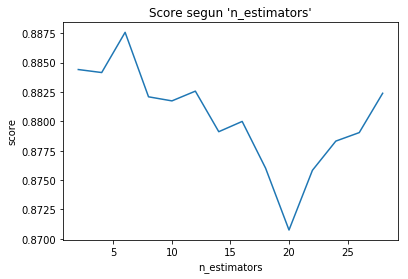

In [42]:
# Probar diferentes cantidades de estimadores (n_estimators)
estimators = np.arange(2, 30, 2)
scores = []

for n in estimators:
    model = RandomForestClassifier(n_jobs=-1, random_state=0, class_weight='balanced')
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.title("Score segun 'n_estimators'")
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.plot(estimators, scores)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

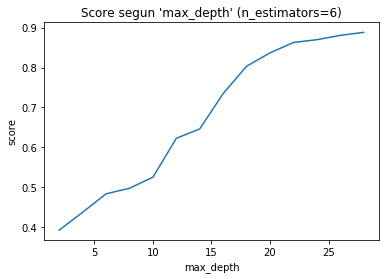

In [43]:
# Probar con diferentes profundidades de árbol.
estimators = np.arange(2, 30, 2)
scores = []

for n in estimators:
    model = RandomForestClassifier(n_jobs=-1, random_state=0, class_weight='balanced')
    model.set_params(max_depth=n, n_estimators=6)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.title("Score segun 'max_depth' (n_estimators=6)")
plt.xlabel("max_depth")
plt.ylabel("score")
plt.plot(estimators, scores)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

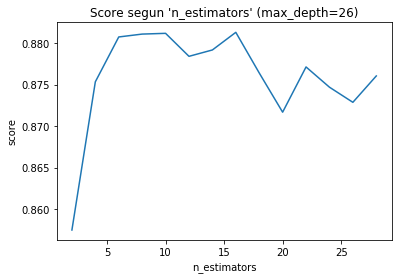

In [44]:
# Probar con diferentes cantidades de estimadores (n_estimators) de árbol.
estimators = np.arange(2, 30, 2)
scores = []

for n in estimators:
    model = RandomForestClassifier(n_jobs=-1, random_state=0, class_weight='balanced')
    model.set_params(max_depth=26, n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.title("Score segun 'n_estimators' (max_depth=26)")
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.plot(estimators, scores)

In [45]:
# Creación del modelo final
model = RandomForestClassifier(n_jobs=-1, random_state=0, class_weight='balanced')
model.set_params(n_estimators=16, max_depth=26)
model.fit(X_train, y_train)

print("'Score' con 16 estimadores y profundidad de 26: " + str('%.3f'%(model.score(X_test, y_test) * 100)) + "%")

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


'Score' con 16 estimadores y profundidad de 26: 88.133%


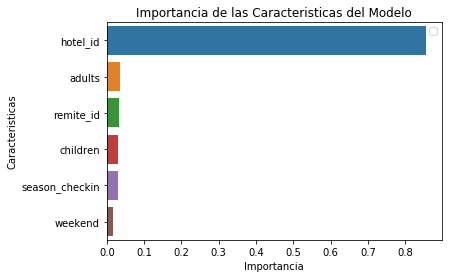

Relevancias de las características:


Características  Random Forests
0       remite_id        0.032554
1          adults        0.036005
2        children        0.030073
3        hotel_id        0.854757
4  season_checkin        0.029007
5         weekend        0.017605

In [46]:
# Gráfico con las importancias de las características del modelo creado.
importancias_caract = pd.Series(model.feature_importances_, index=pred_caract).sort_values(ascending=False)

%matplotlib inline

sb.barplot(x=importancias_caract, y=importancias_caract.index)

plt.xlabel('Importancia')
plt.ylabel('Caracteristicas')
plt.title("Importancia de las Caracteristicas del Modelo")
plt.legend()
plt.show()

# Relevancias de las características.
print ('Relevancias de las características:')
display(pd.DataFrame({'Características': pred_caract, 'Random Forests': model.feature_importances_}))

## Matriz de Confusión

In [47]:
predictions = model.predict(X_test)
confusion_matrix(y_test, predictions)

array([[58248,  6745],
       [ 1123,   183]])

## Comprobación Predicciones Modelo 3

In [48]:
for prueba in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

    predictions = model.predict(X_test)
    print (confusion_matrix(y_test, predictions))
    print "\n"

[[55235  6788]
 [  629   613]]


[[55324  6700]
 [  630   611]]


[[55201  6821]
 [  610   633]]


[[55095  6907]
 [  616   647]]


[[55268  6785]
 [  603   609]]


[[55179  6828]
 [  641   617]]


[[55228  6785]
 [  606   646]]


[[55181  6818]
 [  624   642]]


[[55339  6699]
 [  591   636]]


[[55204  6846]
 [  610   605]]




## Reglas Árboles Modelo 3

In [49]:
# https://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree
for tree_idx, est in enumerate(model.estimators_):
    tree = est.tree_
    assert tree.value.shape[1] == 1 # no support for multi-output

    print('TREE: {}'.format(tree_idx))

    iterator = enumerate(zip(tree.children_left, tree.children_right, tree.feature, tree.threshold, tree.value))
    for node_idx, data in iterator:
        left, right, feature, th, value = data

        # left: index of left child (if any)
        # right: index of right child (if any)
        # feature: index of the feature to check
        # th: the threshold to compare against
        # value: values associated with classes            

        # for classifier, value is 0 except the index of the class to return
        class_idx = np.argmax(value[0])

        if left == -1 and right == -1:
            print('{} LEAF: return class={}'.format(node_idx, class_idx))
        else:
            print('{} NODE: if feature[{}] < {} then next={} else next={}'.format(node_idx, feature, th, left, right))
            
    print("\n")

TREE: 0
0 NODE: if feature[0] < 109.5 then next=1 else next=3540
1 NODE: if feature[4] < 2.5 then next=2 else next=2365
2 NODE: if feature[1] < 1.5 then next=3 else next=364
3 NODE: if feature[2] < 0.5 then next=4 else next=339
4 NODE: if feature[4] < 1.5 then next=5 else next=6
5 LEAF: return class=0
6 NODE: if feature[3] < 482.0 then next=7 else next=8
7 LEAF: return class=0
8 NODE: if feature[5] < 0.5 then next=9 else next=236
9 NODE: if feature[3] < 308528.0 then next=10 else next=235
10 NODE: if feature[0] < 58.0 then next=11 else next=196
11 NODE: if feature[3] < 3476.0 then next=12 else next=59
12 NODE: if feature[3] < 1285.0 then next=13 else next=16
13 NODE: if feature[3] < 599.0 then next=14 else next=15
14 LEAF: return class=1
15 LEAF: return class=0
16 NODE: if feature[3] < 1770.5 then next=17 else next=24
17 NODE: if feature[3] < 1747.0 then next=18 else next=23
18 NODE: if feature[3] < 1406.0 then next=19 else next=22
19 NODE: if feature[3] < 1315.0 then next=20 else next

973 LEAF: return class=1
974 LEAF: return class=1
975 LEAF: return class=0
976 NODE: if feature[3] < 41265.5 then next=977 else next=980
977 NODE: if feature[3] < 41242.5 then next=978 else next=979
978 LEAF: return class=1
979 LEAF: return class=1
980 NODE: if feature[3] < 42014.0 then next=981 else next=982
981 LEAF: return class=0
982 LEAF: return class=1
983 NODE: if feature[3] < 84754.0 then next=984 else next=993
984 NODE: if feature[3] < 65644.5 then next=985 else next=992
985 NODE: if feature[3] < 65433.0 then next=986 else next=991
986 NODE: if feature[3] < 48434.0 then next=987 else next=990
987 NODE: if feature[3] < 48409.0 then next=988 else next=989
988 LEAF: return class=0
989 LEAF: return class=1
990 LEAF: return class=0
991 LEAF: return class=1
992 LEAF: return class=0
993 NODE: if feature[3] < 88314.5 then next=994 else next=999
994 NODE: if feature[3] < 88050.0 then next=995 else next=998
995 NODE: if feature[3] < 84944.0 then next=996 else next=997
996 LEAF: return c

1167 LEAF: return class=0
1168 NODE: if feature[3] < 197156.0 then next=1169 else next=1276
1169 NODE: if feature[3] < 186987.5 then next=1170 else next=1265
1170 NODE: if feature[2] < 1.5 then next=1171 else next=1224
1171 NODE: if feature[3] < 4263.0 then next=1172 else next=1183
1172 NODE: if feature[3] < 4229.0 then next=1173 else next=1174
1173 LEAF: return class=0
1174 NODE: if feature[3] < 4258.0 then next=1175 else next=1182
1175 NODE: if feature[3] < 4243.5 then next=1176 else next=1179
1176 NODE: if feature[3] < 4233.5 then next=1177 else next=1178
1177 LEAF: return class=1
1178 LEAF: return class=0
1179 NODE: if feature[3] < 4254.0 then next=1180 else next=1181
1180 LEAF: return class=1
1181 LEAF: return class=1
1182 LEAF: return class=1
1183 NODE: if feature[3] < 150474.5 then next=1184 else next=1197
1184 NODE: if feature[3] < 4700.0 then next=1185 else next=1192
1185 NODE: if feature[3] < 4676.5 then next=1186 else next=1191
1186 NODE: if feature[3] < 4594.5 then next=118

1883 NODE: if feature[3] < 26687.0 then next=1884 else next=1885
1884 LEAF: return class=1
1885 NODE: if feature[3] < 26695.5 then next=1886 else next=1887
1886 LEAF: return class=1
1887 NODE: if feature[3] < 26731.0 then next=1888 else next=1889
1888 LEAF: return class=0
1889 LEAF: return class=1
1890 LEAF: return class=0
1891 NODE: if feature[3] < 35178.5 then next=1892 else next=1899
1892 NODE: if feature[3] < 30015.5 then next=1893 else next=1898
1893 NODE: if feature[3] < 29169.0 then next=1894 else next=1895
1894 LEAF: return class=1
1895 NODE: if feature[3] < 29955.5 then next=1896 else next=1897
1896 LEAF: return class=0
1897 LEAF: return class=1
1898 LEAF: return class=0
1899 LEAF: return class=1
1900 LEAF: return class=0
1901 NODE: if feature[2] < 0.5 then next=1902 else next=1927
1902 NODE: if feature[3] < 204990.5 then next=1903 else next=1926
1903 NODE: if feature[3] < 204388.0 then next=1904 else next=1925
1904 NODE: if feature[3] < 62419.0 then next=1905 else next=1906
1

2776 LEAF: return class=0
2777 LEAF: return class=0
2778 NODE: if feature[5] < 0.5 then next=2779 else next=2782
2779 NODE: if feature[1] < 2.5 then next=2780 else next=2781
2780 LEAF: return class=1
2781 LEAF: return class=0
2782 NODE: if feature[1] < 1.5 then next=2783 else next=2784
2783 LEAF: return class=0
2784 NODE: if feature[1] < 2.5 then next=2785 else next=2786
2785 LEAF: return class=1
2786 LEAF: return class=0
2787 LEAF: return class=0
2788 NODE: if feature[5] < 0.5 then next=2789 else next=2852
2789 NODE: if feature[4] < 3.5 then next=2790 else next=2851
2790 NODE: if feature[1] < 1.5 then next=2791 else next=2792
2791 LEAF: return class=0
2792 NODE: if feature[1] < 2.5 then next=2793 else next=2850
2793 NODE: if feature[3] < 271.0 then next=2794 else next=2799
2794 NODE: if feature[2] < 2.5 then next=2795 else next=2798
2795 NODE: if feature[3] < 245.5 then next=2796 else next=2797
2796 LEAF: return class=0
2797 LEAF: return class=1
2798 LEAF: return class=0
2799 NODE: if

3293 NODE: if feature[3] < 150844.5 then next=3294 else next=3295
3294 LEAF: return class=0
3295 LEAF: return class=1
3296 LEAF: return class=0
3297 LEAF: return class=1
3298 LEAF: return class=0
3299 LEAF: return class=0
3300 NODE: if feature[1] < 2.5 then next=3301 else next=3308
3301 NODE: if feature[3] < 150852.5 then next=3302 else next=3307
3302 NODE: if feature[3] < 150518.0 then next=3303 else next=3304
3303 LEAF: return class=1
3304 NODE: if feature[3] < 150844.5 then next=3305 else next=3306
3305 LEAF: return class=0
3306 LEAF: return class=1
3307 LEAF: return class=0
3308 LEAF: return class=0
3309 NODE: if feature[1] < 2.5 then next=3310 else next=3315
3310 NODE: if feature[3] < 151027.5 then next=3311 else next=3312
3311 LEAF: return class=0
3312 NODE: if feature[3] < 151064.5 then next=3313 else next=3314
3313 LEAF: return class=1
3314 LEAF: return class=0
3315 LEAF: return class=0
3316 NODE: if feature[4] < 3.5 then next=3317 else next=3336
3317 NODE: if feature[3] < 1508

3929 NODE: if feature[3] < 76367.0 then next=3930 else next=3931
3930 LEAF: return class=0
3931 NODE: if feature[5] < 0.5 then next=3932 else next=3945
3932 NODE: if feature[2] < 0.5 then next=3933 else next=3944
3933 NODE: if feature[1] < 2.5 then next=3934 else next=3943
3934 NODE: if feature[3] < 111797.5 then next=3935 else next=3942
3935 NODE: if feature[0] < 316.5 then next=3936 else next=3937
3936 LEAF: return class=0
3937 NODE: if feature[3] < 91882.5 then next=3938 else next=3941
3938 NODE: if feature[3] < 84128.5 then next=3939 else next=3940
3939 LEAF: return class=1
3940 LEAF: return class=1
3941 LEAF: return class=0
3942 LEAF: return class=1
3943 LEAF: return class=0
3944 LEAF: return class=0
3945 LEAF: return class=0
3946 LEAF: return class=0
3947 LEAF: return class=0
3948 LEAF: return class=0


TREE: 1
0 NODE: if feature[3] < 4599.0 then next=1 else next=1270
1 NODE: if feature[1] < 1.5 then next=2 else next=167
2 NODE: if feature[4] < 2.5 then next=3 else next=138
3 NOD

663 NODE: if feature[5] < 0.5 then next=664 else next=669
664 NODE: if feature[3] < 1755.0 then next=665 else next=668
665 NODE: if feature[3] < 1736.0 then next=666 else next=667
666 LEAF: return class=0
667 LEAF: return class=1
668 LEAF: return class=0
669 NODE: if feature[3] < 1854.0 then next=670 else next=677
670 NODE: if feature[3] < 1786.0 then next=671 else next=672
671 LEAF: return class=0
672 NODE: if feature[3] < 1804.5 then next=673 else next=674
673 LEAF: return class=1
674 NODE: if feature[3] < 1824.5 then next=675 else next=676
675 LEAF: return class=0
676 LEAF: return class=1
677 LEAF: return class=0
678 LEAF: return class=1
679 LEAF: return class=0
680 NODE: if feature[2] < 0.5 then next=681 else next=692
681 NODE: if feature[5] < 0.5 then next=682 else next=683
682 LEAF: return class=0
683 NODE: if feature[3] < 2173.5 then next=684 else next=691
684 NODE: if feature[3] < 1757.5 then next=685 else next=686
685 LEAF: return class=0
686 NODE: if feature[3] < 1821.0 then 

1635 NODE: if feature[2] < 1.5 then next=1636 else next=1637
1636 LEAF: return class=1
1637 LEAF: return class=0
1638 LEAF: return class=0
1639 LEAF: return class=0
1640 LEAF: return class=0
1641 NODE: if feature[3] < 196917.0 then next=1642 else next=1643
1642 LEAF: return class=0
1643 NODE: if feature[3] < 202794.5 then next=1644 else next=1645
1644 LEAF: return class=1
1645 LEAF: return class=0
1646 NODE: if feature[0] < 109.5 then next=1647 else next=3798
1647 NODE: if feature[2] < 0.5 then next=1648 else next=3025
1648 NODE: if feature[1] < 2.5 then next=1649 else next=2892
1649 NODE: if feature[3] < 308008.5 then next=1650 else next=2787
1650 NODE: if feature[3] < 186878.0 then next=1651 else next=2306
1651 NODE: if feature[3] < 4664.0 then next=1652 else next=1667
1652 NODE: if feature[5] < 0.5 then next=1653 else next=1666
1653 NODE: if feature[0] < 58.0 then next=1654 else next=1665
1654 NODE: if feature[4] < 2.5 then next=1655 else next=1664
1655 NODE: if feature[3] < 4633.0 

2818 NODE: if feature[3] < 382534.0 then next=2819 else next=2820
2819 LEAF: return class=0
2820 LEAF: return class=1
2821 NODE: if feature[3] < 378050.0 then next=2822 else next=2823
2822 LEAF: return class=1
2823 LEAF: return class=0
2824 LEAF: return class=0
2825 LEAF: return class=0
2826 LEAF: return class=0
2827 NODE: if feature[3] < 395406.5 then next=2828 else next=2891
2828 NODE: if feature[3] < 366095.0 then next=2829 else next=2864
2829 NODE: if feature[3] < 359790.0 then next=2830 else next=2841
2830 NODE: if feature[0] < 58.0 then next=2831 else next=2834
2831 NODE: if feature[3] < 308288.0 then next=2832 else next=2833
2832 LEAF: return class=1
2833 LEAF: return class=0
2834 NODE: if feature[4] < 2.5 then next=2835 else next=2840
2835 NODE: if feature[3] < 310014.0 then next=2836 else next=2839
2836 NODE: if feature[3] < 309779.5 then next=2837 else next=2838
2837 LEAF: return class=0
2838 LEAF: return class=1
2839 LEAF: return class=0
2840 LEAF: return class=0
2841 NODE: 

3032 LEAF: return class=0
3033 NODE: if feature[2] < 2.5 then next=3034 else next=3037
3034 NODE: if feature[3] < 4705.0 then next=3035 else next=3036
3035 LEAF: return class=1
3036 LEAF: return class=0
3037 LEAF: return class=0
3038 LEAF: return class=0
3039 NODE: if feature[0] < 58.0 then next=3040 else next=3249
3040 NODE: if feature[1] < 3.5 then next=3041 else next=3248
3041 NODE: if feature[2] < 3.5 then next=3042 else next=3247
3042 NODE: if feature[1] < 2.5 then next=3043 else next=3236
3043 NODE: if feature[4] < 1.5 then next=3044 else next=3045
3044 LEAF: return class=0
3045 NODE: if feature[2] < 2.5 then next=3046 else next=3231
3046 NODE: if feature[2] < 1.5 then next=3047 else next=3108
3047 NODE: if feature[3] < 242699.0 then next=3048 else next=3107
3048 NODE: if feature[3] < 219178.5 then next=3049 else next=3094
3049 NODE: if feature[3] < 168438.5 then next=3050 else next=3081
3050 NODE: if feature[3] < 168324.0 then next=3051 else next=3080
3051 NODE: if feature[3] < 

3723 LEAF: return class=0
3724 LEAF: return class=1
3725 LEAF: return class=0
3726 NODE: if feature[1] < 2.5 then next=3727 else next=3732
3727 NODE: if feature[3] < 151682.0 then next=3728 else next=3731
3728 NODE: if feature[3] < 142100.0 then next=3729 else next=3730
3729 LEAF: return class=0
3730 LEAF: return class=1
3731 LEAF: return class=0
3732 LEAF: return class=0
3733 NODE: if feature[3] < 286443.0 then next=3734 else next=3793
3734 NODE: if feature[3] < 150878.0 then next=3735 else next=3758
3735 NODE: if feature[3] < 150864.0 then next=3736 else next=3757
3736 NODE: if feature[0] < 58.0 then next=3737 else next=3756
3737 NODE: if feature[4] < 3.5 then next=3738 else next=3755
3738 NODE: if feature[3] < 5091.5 then next=3739 else next=3740
3739 LEAF: return class=0
3740 NODE: if feature[3] < 5120.5 then next=3741 else next=3742
3741 LEAF: return class=1
3742 NODE: if feature[3] < 48406.5 then next=3743 else next=3744
3743 LEAF: return class=0
3744 NODE: if feature[2] < 2.5 th

547 NODE: if feature[3] < 4052.0 then next=548 else next=549
548 LEAF: return class=0
549 NODE: if feature[3] < 4077.0 then next=550 else next=553
550 NODE: if feature[3] < 4054.0 then next=551 else next=552
551 LEAF: return class=1
552 LEAF: return class=0
553 LEAF: return class=1
554 LEAF: return class=0
555 NODE: if feature[3] < 4078.5 then next=556 else next=557
556 LEAF: return class=1
557 LEAF: return class=0
558 NODE: if feature[1] < 1.5 then next=559 else next=560
559 LEAF: return class=0
560 NODE: if feature[3] < 4186.5 then next=561 else next=568
561 NODE: if feature[3] < 4100.5 then next=562 else next=567
562 NODE: if feature[3] < 4097.0 then next=563 else next=564
563 LEAF: return class=1
564 NODE: if feature[1] < 2.5 then next=565 else next=566
565 LEAF: return class=1
566 LEAF: return class=0
567 LEAF: return class=0
568 LEAF: return class=1
569 NODE: if feature[1] < 1.5 then next=570 else next=579
570 NODE: if feature[3] < 4274.0 then next=571 else next=574
571 NODE: if 

1378 LEAF: return class=0
1379 LEAF: return class=1
1380 LEAF: return class=0
1381 LEAF: return class=0
1382 NODE: if feature[3] < 202011.5 then next=1383 else next=1438
1383 NODE: if feature[3] < 191857.0 then next=1384 else next=1437
1384 NODE: if feature[3] < 156386.0 then next=1385 else next=1424
1385 NODE: if feature[2] < 0.5 then next=1386 else next=1423
1386 NODE: if feature[3] < 61526.0 then next=1387 else next=1398
1387 NODE: if feature[3] < 9688.5 then next=1388 else next=1397
1388 NODE: if feature[3] < 9082.5 then next=1389 else next=1396
1389 NODE: if feature[3] < 4890.0 then next=1390 else next=1395
1390 NODE: if feature[3] < 4849.5 then next=1391 else next=1394
1391 NODE: if feature[3] < 4587.0 then next=1392 else next=1393
1392 LEAF: return class=1
1393 LEAF: return class=0
1394 LEAF: return class=1
1395 LEAF: return class=0
1396 LEAF: return class=1
1397 LEAF: return class=0
1398 NODE: if feature[3] < 64623.0 then next=1399 else next=1400
1399 LEAF: return class=1
1400 

2214 NODE: if feature[3] < 148458.5 then next=2215 else next=2220
2215 NODE: if feature[3] < 148453.5 then next=2216 else next=2219
2216 NODE: if feature[3] < 148379.5 then next=2217 else next=2218
2217 LEAF: return class=1
2218 LEAF: return class=0
2219 LEAF: return class=1
2220 NODE: if feature[3] < 150341.0 then next=2221 else next=2222
2221 LEAF: return class=0
2222 NODE: if feature[3] < 150350.5 then next=2223 else next=2224
2223 LEAF: return class=1
2224 LEAF: return class=0
2225 NODE: if feature[3] < 150397.0 then next=2226 else next=2229
2226 NODE: if feature[3] < 150364.0 then next=2227 else next=2228
2227 LEAF: return class=1
2228 LEAF: return class=0
2229 NODE: if feature[3] < 150399.5 then next=2230 else next=2231
2230 LEAF: return class=1
2231 LEAF: return class=1
2232 NODE: if feature[3] < 150503.0 then next=2233 else next=2234
2233 LEAF: return class=0
2234 NODE: if feature[3] < 150518.0 then next=2235 else next=2236
2235 LEAF: return class=1
2236 NODE: if feature[3] < 1

3048 LEAF: return class=1
3049 LEAF: return class=0
3050 NODE: if feature[3] < 227397.5 then next=3051 else next=3066
3051 NODE: if feature[1] < 3.0 then next=3052 else next=3063
3052 NODE: if feature[2] < 1.5 then next=3053 else next=3054
3053 LEAF: return class=0
3054 NODE: if feature[3] < 215531.5 then next=3055 else next=3062
3055 NODE: if feature[3] < 200273.0 then next=3056 else next=3057
3056 LEAF: return class=0
3057 NODE: if feature[3] < 212111.5 then next=3058 else next=3061
3058 NODE: if feature[3] < 205670.0 then next=3059 else next=3060
3059 LEAF: return class=1
3060 LEAF: return class=0
3061 LEAF: return class=1
3062 LEAF: return class=0
3063 NODE: if feature[2] < 2.0 then next=3064 else next=3065
3064 LEAF: return class=1
3065 LEAF: return class=0
3066 NODE: if feature[2] < 1.5 then next=3067 else next=3068
3067 LEAF: return class=0
3068 NODE: if feature[2] < 2.5 then next=3069 else next=3072
3069 NODE: if feature[3] < 347632.0 then next=3070 else next=3071
3070 LEAF: re

9 LEAF: return class=0
10 NODE: if feature[0] < 58.0 then next=11 else next=202
11 NODE: if feature[3] < 1770.5 then next=12 else next=31
12 NODE: if feature[3] < 1315.0 then next=13 else next=28
13 NODE: if feature[3] < 1264.0 then next=14 else next=25
14 NODE: if feature[3] < 822.0 then next=15 else next=24
15 NODE: if feature[3] < 717.5 then next=16 else next=19
16 NODE: if feature[3] < 482.0 then next=17 else next=18
17 LEAF: return class=1
18 LEAF: return class=0
19 NODE: if feature[3] < 725.5 then next=20 else next=21
20 LEAF: return class=1
21 NODE: if feature[3] < 739.0 then next=22 else next=23
22 LEAF: return class=0
23 LEAF: return class=1
24 LEAF: return class=0
25 NODE: if feature[3] < 1285.0 then next=26 else next=27
26 LEAF: return class=1
27 LEAF: return class=1
28 NODE: if feature[3] < 1747.0 then next=29 else next=30
29 LEAF: return class=0
30 LEAF: return class=1
31 NODE: if feature[3] < 149578.5 then next=32 else next=93
32 NODE: if feature[3] < 3405.0 then next=33 

1058 NODE: if feature[3] < 2684.5 then next=1059 else next=1060
1059 LEAF: return class=0
1060 LEAF: return class=1
1061 LEAF: return class=0
1062 NODE: if feature[3] < 4289.5 then next=1063 else next=1074
1063 NODE: if feature[3] < 4269.5 then next=1064 else next=1069
1064 NODE: if feature[3] < 4267.5 then next=1065 else next=1068
1065 NODE: if feature[3] < 4258.0 then next=1066 else next=1067
1066 LEAF: return class=1
1067 LEAF: return class=0
1068 LEAF: return class=1
1069 NODE: if feature[3] < 4285.0 then next=1070 else next=1073
1070 NODE: if feature[3] < 4272.5 then next=1071 else next=1072
1071 LEAF: return class=1
1072 LEAF: return class=0
1073 LEAF: return class=1
1074 NODE: if feature[3] < 4356.5 then next=1075 else next=1076
1075 LEAF: return class=0
1076 LEAF: return class=1
1077 LEAF: return class=0
1078 NODE: if feature[3] < 4234.5 then next=1079 else next=1080
1079 LEAF: return class=0
1080 NODE: if feature[3] < 4244.0 then next=1081 else next=1082
1081 LEAF: return clas

1993 LEAF: return class=1
1994 LEAF: return class=0
1995 LEAF: return class=1
1996 NODE: if feature[3] < 227397.5 then next=1997 else next=1998
1997 LEAF: return class=0
1998 NODE: if feature[2] < 0.5 then next=1999 else next=2006
1999 NODE: if feature[3] < 227485.0 then next=2000 else next=2001
2000 LEAF: return class=1
2001 NODE: if feature[3] < 238670.5 then next=2002 else next=2003
2002 LEAF: return class=0
2003 NODE: if feature[3] < 238847.0 then next=2004 else next=2005
2004 LEAF: return class=1
2005 LEAF: return class=0
2006 LEAF: return class=0
2007 NODE: if feature[3] < 223516.5 then next=2008 else next=2017
2008 NODE: if feature[3] < 219751.0 then next=2009 else next=2016
2009 NODE: if feature[3] < 215530.0 then next=2010 else next=2011
2010 LEAF: return class=0
2011 NODE: if feature[3] < 219679.5 then next=2012 else next=2015
2012 NODE: if feature[3] < 216355.0 then next=2013 else next=2014
2013 LEAF: return class=1
2014 LEAF: return class=0
2015 LEAF: return class=1
2016 LE

2827 NODE: if feature[3] < 9404.0 then next=2828 else next=2829
2828 LEAF: return class=1
2829 LEAF: return class=0
2830 LEAF: return class=0
2831 LEAF: return class=0
2832 NODE: if feature[0] < 58.0 then next=2833 else next=2838
2833 NODE: if feature[3] < 42039.0 then next=2834 else next=2837
2834 NODE: if feature[5] < 0.5 then next=2835 else next=2836
2835 LEAF: return class=1
2836 LEAF: return class=0
2837 LEAF: return class=0
2838 NODE: if feature[3] < 43246.0 then next=2839 else next=2840
2839 LEAF: return class=0
2840 NODE: if feature[5] < 0.5 then next=2841 else next=2844
2841 NODE: if feature[3] < 48402.0 then next=2842 else next=2843
2842 LEAF: return class=0
2843 LEAF: return class=1
2844 NODE: if feature[0] < 109.5 then next=2845 else next=2848
2845 NODE: if feature[3] < 45162.5 then next=2846 else next=2847
2846 LEAF: return class=1
2847 LEAF: return class=0
2848 NODE: if feature[3] < 47618.5 then next=2849 else next=2852
2849 NODE: if feature[3] < 46852.5 then next=2850 el

30 LEAF: return class=0
31 LEAF: return class=1
32 NODE: if feature[3] < 3087.5 then next=33 else next=34
33 LEAF: return class=0
34 NODE: if feature[3] < 3476.0 then next=35 else next=52
35 NODE: if feature[3] < 3441.0 then next=36 else next=51
36 NODE: if feature[3] < 3282.5 then next=37 else next=38
37 LEAF: return class=1
38 NODE: if feature[3] < 3343.5 then next=39 else next=40
39 LEAF: return class=0
40 NODE: if feature[3] < 3394.5 then next=41 else next=46
41 NODE: if feature[3] < 3357.0 then next=42 else next=43
42 LEAF: return class=1
43 NODE: if feature[3] < 3388.5 then next=44 else next=45
44 LEAF: return class=0
45 LEAF: return class=1
46 NODE: if feature[3] < 3399.5 then next=47 else next=48
47 LEAF: return class=0
48 NODE: if feature[3] < 3405.0 then next=49 else next=50
49 LEAF: return class=1
50 LEAF: return class=0
51 LEAF: return class=1
52 NODE: if feature[3] < 9548.0 then next=53 else next=54
53 LEAF: return class=0
54 NODE: if feature[3] < 9751.0 then next=55 else 

656 LEAF: return class=1
657 LEAF: return class=0
658 NODE: if feature[3] < 6790.0 then next=659 else next=672
659 NODE: if feature[3] < 6246.0 then next=660 else next=667
660 NODE: if feature[3] < 5493.0 then next=661 else next=666
661 NODE: if feature[3] < 5340.5 then next=662 else next=665
662 NODE: if feature[3] < 5171.0 then next=663 else next=664
663 LEAF: return class=1
664 LEAF: return class=0
665 LEAF: return class=1
666 LEAF: return class=0
667 NODE: if feature[3] < 6415.5 then next=668 else next=669
668 LEAF: return class=1
669 NODE: if feature[3] < 6667.0 then next=670 else next=671
670 LEAF: return class=0
671 LEAF: return class=1
672 NODE: if feature[3] < 7386.5 then next=673 else next=674
673 LEAF: return class=0
674 NODE: if feature[3] < 41210.5 then next=675 else next=696
675 NODE: if feature[3] < 9351.5 then next=676 else next=689
676 NODE: if feature[3] < 8502.5 then next=677 else next=684
677 NODE: if feature[3] < 7920.0 then next=678 else next=681
678 NODE: if feat

1331 LEAF: return class=1
1332 LEAF: return class=0
1333 NODE: if feature[3] < 9150.5 then next=1334 else next=1335
1334 LEAF: return class=1
1335 NODE: if feature[3] < 51858.0 then next=1336 else next=1337
1336 LEAF: return class=0
1337 LEAF: return class=1
1338 NODE: if feature[3] < 3034.5 then next=1339 else next=1340
1339 LEAF: return class=1
1340 NODE: if feature[3] < 5211.5 then next=1341 else next=1342
1341 LEAF: return class=0
1342 LEAF: return class=1
1343 NODE: if feature[3] < 167561.5 then next=1344 else next=1345
1344 LEAF: return class=0
1345 NODE: if feature[4] < 1.5 then next=1346 else next=1347
1346 LEAF: return class=0
1347 NODE: if feature[2] < 1.5 then next=1348 else next=1365
1348 NODE: if feature[3] < 167608.5 then next=1349 else next=1350
1349 LEAF: return class=1
1350 NODE: if feature[2] < 0.5 then next=1351 else next=1364
1351 NODE: if feature[3] < 206808.0 then next=1352 else next=1357
1352 NODE: if feature[3] < 189392.0 then next=1353 else next=1356
1353 NODE:

2063 NODE: if feature[3] < 186917.5 then next=2064 else next=2075
2064 NODE: if feature[3] < 168347.5 then next=2065 else next=2074
2065 NODE: if feature[3] < 167378.0 then next=2066 else next=2071
2066 NODE: if feature[3] < 167130.5 then next=2067 else next=2070
2067 NODE: if feature[3] < 166992.0 then next=2068 else next=2069
2068 LEAF: return class=1
2069 LEAF: return class=0
2070 LEAF: return class=1
2071 NODE: if feature[3] < 168243.5 then next=2072 else next=2073
2072 LEAF: return class=0
2073 LEAF: return class=1
2074 LEAF: return class=0
2075 LEAF: return class=1
2076 NODE: if feature[3] < 192382.0 then next=2077 else next=2082
2077 NODE: if feature[3] < 189938.0 then next=2078 else next=2081
2078 NODE: if feature[3] < 189905.5 then next=2079 else next=2080
2079 LEAF: return class=0
2080 LEAF: return class=1
2081 LEAF: return class=0
2082 NODE: if feature[3] < 192622.0 then next=2083 else next=2084
2083 LEAF: return class=1
2084 NODE: if feature[3] < 201668.5 then next=2085 els

2800 LEAF: return class=0
2801 NODE: if feature[3] < 220893.0 then next=2802 else next=2803
2802 LEAF: return class=0
2803 NODE: if feature[3] < 221371.0 then next=2804 else next=2809
2804 NODE: if feature[3] < 220982.0 then next=2805 else next=2806
2805 LEAF: return class=1
2806 NODE: if feature[1] < 2.5 then next=2807 else next=2808
2807 LEAF: return class=1
2808 LEAF: return class=0
2809 NODE: if feature[3] < 221979.0 then next=2810 else next=2811
2810 LEAF: return class=0
2811 LEAF: return class=1
2812 NODE: if feature[3] < 219504.5 then next=2813 else next=2814
2813 LEAF: return class=1
2814 LEAF: return class=0
2815 NODE: if feature[3] < 250225.0 then next=2816 else next=2817
2816 LEAF: return class=0
2817 NODE: if feature[3] < 366370.5 then next=2818 else next=2851
2818 NODE: if feature[1] < 1.5 then next=2819 else next=2820
2819 LEAF: return class=0
2820 NODE: if feature[3] < 357927.5 then next=2821 else next=2842
2821 NODE: if feature[1] < 3.5 then next=2822 else next=2839
282

3493 NODE: if feature[3] < 234415.0 then next=3494 else next=3513
3494 NODE: if feature[3] < 233392.5 then next=3495 else next=3502
3495 NODE: if feature[1] < 1.5 then next=3496 else next=3497
3496 LEAF: return class=0
3497 NODE: if feature[3] < 231778.5 then next=3498 else next=3501
3498 NODE: if feature[5] < 0.5 then next=3499 else next=3500
3499 LEAF: return class=1
3500 LEAF: return class=0
3501 LEAF: return class=0
3502 NODE: if feature[3] < 234043.0 then next=3503 else next=3506
3503 NODE: if feature[5] < 0.5 then next=3504 else next=3505
3504 LEAF: return class=1
3505 LEAF: return class=0
3506 NODE: if feature[1] < 1.5 then next=3507 else next=3508
3507 LEAF: return class=0
3508 NODE: if feature[3] < 234400.0 then next=3509 else next=3510
3509 LEAF: return class=0
3510 NODE: if feature[5] < 0.5 then next=3511 else next=3512
3511 LEAF: return class=0
3512 LEAF: return class=1
3513 NODE: if feature[3] < 259555.0 then next=3514 else next=3525
3514 NODE: if feature[3] < 251878.5 the

475 LEAF: return class=0
476 NODE: if feature[0] < 78.5 then next=477 else next=504
477 NODE: if feature[3] < 4597.5 then next=478 else next=479
478 LEAF: return class=0
479 NODE: if feature[3] < 4745.0 then next=480 else next=503
480 NODE: if feature[1] < 2.5 then next=481 else next=502
481 NODE: if feature[3] < 4716.0 then next=482 else next=501
482 NODE: if feature[3] < 4711.5 then next=483 else next=500
483 NODE: if feature[3] < 4664.0 then next=484 else next=499
484 NODE: if feature[3] < 4662.5 then next=485 else next=498
485 NODE: if feature[3] < 4633.0 then next=486 else next=497
486 NODE: if feature[3] < 4626.0 then next=487 else next=494
487 NODE: if feature[3] < 4600.0 then next=488 else next=489
488 LEAF: return class=1
489 NODE: if feature[3] < 4619.0 then next=490 else next=491
490 LEAF: return class=0
491 NODE: if feature[3] < 4624.5 then next=492 else next=493
492 LEAF: return class=1
493 LEAF: return class=0
494 NODE: if feature[3] < 4629.5 then next=495 else next=496
4

1569 LEAF: return class=1
1570 NODE: if feature[3] < 2620.0 then next=1571 else next=1572
1571 LEAF: return class=0
1572 LEAF: return class=1
1573 NODE: if feature[3] < 2685.5 then next=1574 else next=1575
1574 LEAF: return class=0
1575 NODE: if feature[3] < 2732.5 then next=1576 else next=1583
1576 NODE: if feature[3] < 2689.0 then next=1577 else next=1578
1577 LEAF: return class=1
1578 NODE: if feature[3] < 2691.5 then next=1579 else next=1580
1579 LEAF: return class=1
1580 NODE: if feature[3] < 2717.5 then next=1581 else next=1582
1581 LEAF: return class=0
1582 LEAF: return class=1
1583 NODE: if feature[3] < 2872.0 then next=1584 else next=1585
1584 LEAF: return class=0
1585 LEAF: return class=1
1586 LEAF: return class=0
1587 LEAF: return class=1
1588 LEAF: return class=0
1589 LEAF: return class=0
1590 NODE: if feature[1] < 3.5 then next=1591 else next=1602
1591 NODE: if feature[3] < 2173.5 then next=1592 else next=1601
1592 NODE: if feature[3] < 1757.5 then next=1593 else next=1594

2330 NODE: if feature[5] < 0.5 then next=2331 else next=2344
2331 NODE: if feature[3] < 7755.0 then next=2332 else next=2333
2332 LEAF: return class=0
2333 NODE: if feature[3] < 166942.0 then next=2334 else next=2343
2334 NODE: if feature[3] < 7817.5 then next=2335 else next=2336
2335 LEAF: return class=1
2336 NODE: if feature[3] < 151983.0 then next=2337 else next=2338
2337 LEAF: return class=0
2338 NODE: if feature[3] < 152658.0 then next=2339 else next=2340
2339 LEAF: return class=1
2340 NODE: if feature[3] < 166231.5 then next=2341 else next=2342
2341 LEAF: return class=0
2342 LEAF: return class=1
2343 LEAF: return class=0
2344 NODE: if feature[3] < 205264.0 then next=2345 else next=2350
2345 NODE: if feature[3] < 4274.0 then next=2346 else next=2349
2346 NODE: if feature[3] < 4236.0 then next=2347 else next=2348
2347 LEAF: return class=0
2348 LEAF: return class=1
2349 LEAF: return class=0
2350 NODE: if feature[3] < 206107.5 then next=2351 else next=2352
2351 LEAF: return class=1
2

3211 LEAF: return class=1
3212 LEAF: return class=0
3213 LEAF: return class=0
3214 NODE: if feature[1] < 2.5 then next=3215 else next=3242
3215 NODE: if feature[3] < 150860.5 then next=3216 else next=3241
3216 NODE: if feature[3] < 5089.0 then next=3217 else next=3222
3217 NODE: if feature[3] < 5072.0 then next=3218 else next=3221
3218 NODE: if feature[3] < 4827.0 then next=3219 else next=3220
3219 LEAF: return class=1
3220 LEAF: return class=0
3221 LEAF: return class=1
3222 NODE: if feature[3] < 124189.5 then next=3223 else next=3228
3223 NODE: if feature[3] < 5281.0 then next=3224 else next=3227
3224 NODE: if feature[3] < 5252.0 then next=3225 else next=3226
3225 LEAF: return class=0
3226 LEAF: return class=1
3227 LEAF: return class=0
3228 NODE: if feature[3] < 148523.5 then next=3229 else next=3234
3229 NODE: if feature[3] < 141321.0 then next=3230 else next=3231
3230 LEAF: return class=1
3231 NODE: if feature[3] < 148509.5 then next=3232 else next=3233
3232 LEAF: return class=0
323

518 LEAF: return class=1
519 LEAF: return class=0
520 LEAF: return class=0
521 NODE: if feature[3] < 4516.0 then next=522 else next=523
522 LEAF: return class=0
523 NODE: if feature[3] < 209973.5 then next=524 else next=529
524 NODE: if feature[3] < 7029.5 then next=525 else next=526
525 LEAF: return class=1
526 NODE: if feature[3] < 196917.0 then next=527 else next=528
527 LEAF: return class=0
528 LEAF: return class=1
529 LEAF: return class=0
530 NODE: if feature[3] < 150961.0 then next=531 else next=536
531 NODE: if feature[2] < 0.5 then next=532 else next=535
532 NODE: if feature[3] < 150952.5 then next=533 else next=534
533 LEAF: return class=0
534 LEAF: return class=1
535 LEAF: return class=0
536 LEAF: return class=0
537 NODE: if feature[4] < 2.5 then next=538 else next=2453
538 NODE: if feature[3] < 183.5 then next=539 else next=598
539 NODE: if feature[2] < 0.5 then next=540 else next=597
540 NODE: if feature[3] < 109.0 then next=541 else next=576
541 NODE: if feature[3] < 103.5

1216 LEAF: return class=1
1217 NODE: if feature[3] < 147626.0 then next=1218 else next=1219
1218 LEAF: return class=0
1219 NODE: if feature[3] < 147809.0 then next=1220 else next=1221
1220 LEAF: return class=1
1221 NODE: if feature[3] < 147870.0 then next=1222 else next=1223
1222 LEAF: return class=0
1223 LEAF: return class=1
1224 LEAF: return class=0
1225 NODE: if feature[3] < 4327.5 then next=1226 else next=1257
1226 NODE: if feature[3] < 1835.5 then next=1227 else next=1232
1227 NODE: if feature[3] < 351.5 then next=1228 else next=1231
1228 NODE: if feature[3] < 343.0 then next=1229 else next=1230
1229 LEAF: return class=0
1230 LEAF: return class=1
1231 LEAF: return class=0
1232 NODE: if feature[3] < 4219.5 then next=1233 else next=1244
1233 NODE: if feature[3] < 3333.5 then next=1234 else next=1243
1234 NODE: if feature[3] < 3326.5 then next=1235 else next=1242
1235 NODE: if feature[3] < 1854.0 then next=1236 else next=1237
1236 LEAF: return class=1
1237 NODE: if feature[3] < 2741.

1851 LEAF: return class=1
1852 LEAF: return class=0
1853 NODE: if feature[1] < 4.5 then next=1854 else next=1863
1854 NODE: if feature[3] < 226299.0 then next=1855 else next=1862
1855 NODE: if feature[3] < 226053.5 then next=1856 else next=1861
1856 NODE: if feature[3] < 190519.0 then next=1857 else next=1860
1857 NODE: if feature[3] < 188270.0 then next=1858 else next=1859
1858 LEAF: return class=0
1859 LEAF: return class=1
1860 LEAF: return class=0
1861 LEAF: return class=1
1862 LEAF: return class=0
1863 LEAF: return class=0
1864 NODE: if feature[3] < 219178.5 then next=1865 else next=1890
1865 NODE: if feature[3] < 209604.0 then next=1866 else next=1881
1866 NODE: if feature[1] < 2.5 then next=1867 else next=1880
1867 NODE: if feature[3] < 185366.5 then next=1868 else next=1871
1868 NODE: if feature[3] < 185305.5 then next=1869 else next=1870
1869 LEAF: return class=0
1870 LEAF: return class=1
1871 NODE: if feature[3] < 197158.5 then next=1872 else next=1873
1872 LEAF: return class=

2692 NODE: if feature[3] < 48434.0 then next=2693 else next=2694
2693 LEAF: return class=0
2694 LEAF: return class=1
2695 NODE: if feature[3] < 151904.5 then next=2696 else next=2699
2696 NODE: if feature[3] < 151778.5 then next=2697 else next=2698
2697 LEAF: return class=0
2698 LEAF: return class=1
2699 LEAF: return class=0
2700 LEAF: return class=0
2701 LEAF: return class=0
2702 NODE: if feature[3] < 71653.0 then next=2703 else next=2720
2703 NODE: if feature[3] < 2279.5 then next=2704 else next=2705
2704 LEAF: return class=0
2705 NODE: if feature[3] < 4310.5 then next=2706 else next=2719
2706 NODE: if feature[3] < 4292.5 then next=2707 else next=2718
2707 NODE: if feature[3] < 2317.5 then next=2708 else next=2709
2708 LEAF: return class=1
2709 NODE: if feature[0] < 58.0 then next=2710 else next=2717
2710 NODE: if feature[4] < 3.5 then next=2711 else next=2716
2711 NODE: if feature[3] < 4217.0 then next=2712 else next=2713
2712 LEAF: return class=0
2713 NODE: if feature[3] < 4218.5 t

3600 LEAF: return class=0
3601 LEAF: return class=1
3602 LEAF: return class=0
3603 LEAF: return class=0
3604 NODE: if feature[3] < 153429.5 then next=3605 else next=3608
3605 NODE: if feature[3] < 100242.0 then next=3606 else next=3607
3606 LEAF: return class=0
3607 LEAF: return class=1
3608 LEAF: return class=0
3609 NODE: if feature[1] < 1.5 then next=3610 else next=3611
3610 LEAF: return class=0
3611 NODE: if feature[3] < 217721.0 then next=3612 else next=3613
3612 LEAF: return class=1
3613 NODE: if feature[3] < 241664.0 then next=3614 else next=3615
3614 LEAF: return class=0
3615 NODE: if feature[3] < 241755.0 then next=3616 else next=3617
3616 LEAF: return class=1
3617 LEAF: return class=0
3618 LEAF: return class=0
3619 LEAF: return class=0
3620 NODE: if feature[0] < 109.5 then next=3621 else next=3838
3621 NODE: if feature[4] < 2.5 then next=3622 else next=3777
3622 NODE: if feature[1] < 2.5 then next=3623 else next=3758
3623 NODE: if feature[2] < 2.5 then next=3624 else next=3757

808 LEAF: return class=0
809 LEAF: return class=1
810 LEAF: return class=0
811 LEAF: return class=0
812 NODE: if feature[5] < 0.5 then next=813 else next=900
813 NODE: if feature[3] < 9355.5 then next=814 else next=875
814 NODE: if feature[3] < 5148.5 then next=815 else next=850
815 NODE: if feature[3] < 4790.0 then next=816 else next=849
816 NODE: if feature[3] < 4405.0 then next=817 else next=834
817 NODE: if feature[3] < 4358.5 then next=818 else next=827
818 NODE: if feature[3] < 4253.5 then next=819 else next=820
819 LEAF: return class=1
820 NODE: if feature[3] < 4283.0 then next=821 else next=824
821 NODE: if feature[3] < 4267.0 then next=822 else next=823
822 LEAF: return class=0
823 LEAF: return class=0
824 NODE: if feature[3] < 4308.0 then next=825 else next=826
825 LEAF: return class=1
826 LEAF: return class=0
827 NODE: if feature[3] < 4403.5 then next=828 else next=833
828 NODE: if feature[3] < 4360.5 then next=829 else next=832
829 NODE: if feature[3] < 4359.5 then next=830

1705 LEAF: return class=1
1706 LEAF: return class=0
1707 LEAF: return class=1
1708 NODE: if feature[3] < 197156.0 then next=1709 else next=1722
1709 NODE: if feature[3] < 185438.0 then next=1710 else next=1721
1710 NODE: if feature[3] < 167763.0 then next=1711 else next=1712
1711 LEAF: return class=0
1712 NODE: if feature[3] < 168438.5 then next=1713 else next=1718
1713 NODE: if feature[3] < 167824.0 then next=1714 else next=1715
1714 LEAF: return class=1
1715 NODE: if feature[3] < 168325.5 then next=1716 else next=1717
1716 LEAF: return class=0
1717 LEAF: return class=1
1718 NODE: if feature[3] < 185305.5 then next=1719 else next=1720
1719 LEAF: return class=0
1720 LEAF: return class=1
1721 LEAF: return class=0
1722 NODE: if feature[3] < 197275.0 then next=1723 else next=1724
1723 LEAF: return class=1
1724 NODE: if feature[3] < 210003.0 then next=1725 else next=1732
1725 NODE: if feature[3] < 209888.5 then next=1726 else next=1731
1726 NODE: if feature[3] < 203655.0 then next=1727 els

2642 LEAF: return class=0
2643 LEAF: return class=1
2644 LEAF: return class=0
2645 NODE: if feature[0] < 109.5 then next=2646 else next=2647
2646 LEAF: return class=0
2647 NODE: if feature[1] < 2.5 then next=2648 else next=2651
2648 NODE: if feature[3] < 203690.0 then next=2649 else next=2650
2649 LEAF: return class=0
2650 LEAF: return class=1
2651 LEAF: return class=0
2652 NODE: if feature[1] < 1.5 then next=2653 else next=2660
2653 NODE: if feature[3] < 66524.0 then next=2654 else next=2659
2654 NODE: if feature[0] < 316.5 then next=2655 else next=2658
2655 NODE: if feature[3] < 61673.5 then next=2656 else next=2657
2656 LEAF: return class=0
2657 LEAF: return class=1
2658 LEAF: return class=0
2659 LEAF: return class=0
2660 NODE: if feature[3] < 91882.5 then next=2661 else next=2666
2661 NODE: if feature[3] < 91873.5 then next=2662 else next=2663
2662 LEAF: return class=0
2663 NODE: if feature[0] < 316.5 then next=2664 else next=2665
2664 LEAF: return class=0
2665 LEAF: return class=1

3382 LEAF: return class=0
3383 NODE: if feature[3] < 4949.0 then next=3384 else next=3385
3384 LEAF: return class=1
3385 NODE: if feature[3] < 25205.0 then next=3386 else next=3391
3386 NODE: if feature[3] < 7824.5 then next=3387 else next=3390
3387 NODE: if feature[3] < 7822.5 then next=3388 else next=3389
3388 LEAF: return class=0
3389 LEAF: return class=1
3390 LEAF: return class=0
3391 NODE: if feature[3] < 33502.5 then next=3392 else next=3401
3392 NODE: if feature[3] < 25815.5 then next=3393 else next=3394
3393 LEAF: return class=1
3394 NODE: if feature[3] < 26481.0 then next=3395 else next=3396
3395 LEAF: return class=0
3396 NODE: if feature[3] < 26484.0 then next=3397 else next=3398
3397 LEAF: return class=1
3398 NODE: if feature[3] < 29602.5 then next=3399 else next=3400
3399 LEAF: return class=0
3400 LEAF: return class=1
3401 NODE: if feature[3] < 43764.5 then next=3402 else next=3403
3402 LEAF: return class=0
3403 LEAF: return class=1
3404 NODE: if feature[3] < 90790.0 then n

196 LEAF: return class=1
197 LEAF: return class=0
198 NODE: if feature[3] < 258928.5 then next=199 else next=200
199 LEAF: return class=1
200 NODE: if feature[3] < 286215.0 then next=201 else next=202
201 LEAF: return class=0
202 LEAF: return class=1
203 LEAF: return class=0
204 NODE: if feature[3] < 307448.0 then next=205 else next=208
205 NODE: if feature[3] < 303136.0 then next=206 else next=207
206 LEAF: return class=1
207 LEAF: return class=0
208 LEAF: return class=1
209 LEAF: return class=0
210 NODE: if feature[3] < 25292.0 then next=211 else next=212
211 LEAF: return class=0
212 NODE: if feature[0] < 316.5 then next=213 else next=276
213 NODE: if feature[3] < 69806.0 then next=214 else next=241
214 NODE: if feature[3] < 25473.5 then next=215 else next=216
215 LEAF: return class=1
216 NODE: if feature[3] < 27083.5 then next=217 else next=218
217 LEAF: return class=0
218 NODE: if feature[0] < 109.5 then next=219 else next=232
219 NODE: if feature[3] < 27402.0 then next=220 else ne

1220 NODE: if feature[4] < 3.5 then next=1221 else next=1236
1221 NODE: if feature[2] < 0.5 then next=1222 else next=1235
1222 NODE: if feature[3] < 80658.5 then next=1223 else next=1234
1223 NODE: if feature[3] < 78816.0 then next=1224 else next=1233
1224 NODE: if feature[3] < 41997.0 then next=1225 else next=1226
1225 LEAF: return class=0
1226 NODE: if feature[3] < 42033.5 then next=1227 else next=1228
1227 LEAF: return class=1
1228 NODE: if feature[3] < 66418.0 then next=1229 else next=1230
1229 LEAF: return class=0
1230 NODE: if feature[3] < 67299.0 then next=1231 else next=1232
1231 LEAF: return class=1
1232 LEAF: return class=0
1233 LEAF: return class=1
1234 LEAF: return class=0
1235 LEAF: return class=0
1236 LEAF: return class=0
1237 LEAF: return class=0
1238 NODE: if feature[3] < 147906.0 then next=1239 else next=1678
1239 NODE: if feature[4] < 3.5 then next=1240 else next=1671
1240 NODE: if feature[2] < 0.5 then next=1241 else next=1558
1241 NODE: if feature[3] < 1318.5 then n

1926 NODE: if feature[2] < 1.5 then next=1927 else next=1928
1927 LEAF: return class=1
1928 LEAF: return class=0
1929 NODE: if feature[3] < 26750.0 then next=1930 else next=1931
1930 LEAF: return class=0
1931 LEAF: return class=1
1932 NODE: if feature[3] < 26695.5 then next=1933 else next=1934
1933 LEAF: return class=1
1934 NODE: if feature[3] < 26750.0 then next=1935 else next=1936
1935 LEAF: return class=0
1936 NODE: if feature[4] < 2.5 then next=1937 else next=1938
1937 LEAF: return class=1
1938 LEAF: return class=0
1939 NODE: if feature[4] < 2.5 then next=1940 else next=1963
1940 NODE: if feature[3] < 27839.5 then next=1941 else next=1948
1941 NODE: if feature[2] < 0.5 then next=1942 else next=1947
1942 NODE: if feature[5] < 0.5 then next=1943 else next=1946
1943 NODE: if feature[3] < 27695.0 then next=1944 else next=1945
1944 LEAF: return class=0
1945 LEAF: return class=1
1946 LEAF: return class=0
1947 LEAF: return class=0
1948 NODE: if feature[3] < 70053.0 then next=1949 else nex

2897 NODE: if feature[3] < 281088.5 then next=2898 else next=2899
2898 LEAF: return class=0
2899 LEAF: return class=1
2900 LEAF: return class=0
2901 LEAF: return class=1
2902 LEAF: return class=0
2903 NODE: if feature[3] < 299215.5 then next=2904 else next=2905
2904 LEAF: return class=1
2905 NODE: if feature[3] < 299648.0 then next=2906 else next=2907
2906 LEAF: return class=0
2907 LEAF: return class=1
2908 LEAF: return class=0
2909 LEAF: return class=1
2910 NODE: if feature[3] < 378056.0 then next=2911 else next=2912
2911 LEAF: return class=0
2912 NODE: if feature[3] < 386594.0 then next=2913 else next=2918
2913 NODE: if feature[3] < 384438.5 then next=2914 else next=2917
2914 NODE: if feature[3] < 381227.5 then next=2915 else next=2916
2915 LEAF: return class=1
2916 LEAF: return class=0
2917 LEAF: return class=1
2918 LEAF: return class=0
2919 NODE: if feature[3] < 223248.0 then next=2920 else next=2921
2920 LEAF: return class=0
2921 NODE: if feature[3] < 365262.5 then next=2922 else 

3880 LEAF: return class=0
3881 NODE: if feature[3] < 217727.0 then next=3882 else next=3883
3882 LEAF: return class=0
3883 NODE: if feature[5] < 0.5 then next=3884 else next=3891
3884 NODE: if feature[4] < 3.5 then next=3885 else next=3890
3885 NODE: if feature[3] < 222104.0 then next=3886 else next=3889
3886 NODE: if feature[3] < 220271.5 then next=3887 else next=3888
3887 LEAF: return class=0
3888 LEAF: return class=1
3889 LEAF: return class=0
3890 LEAF: return class=0
3891 NODE: if feature[3] < 253783.5 then next=3892 else next=3897
3892 NODE: if feature[3] < 250386.0 then next=3893 else next=3896
3893 NODE: if feature[3] < 220270.0 then next=3894 else next=3895
3894 LEAF: return class=1
3895 LEAF: return class=0
3896 LEAF: return class=1
3897 LEAF: return class=0
3898 NODE: if feature[4] < 3.5 then next=3899 else next=3922
3899 NODE: if feature[3] < 192554.0 then next=3900 else next=3903
3900 NODE: if feature[5] < 0.5 then next=3901 else next=3902
3901 LEAF: return class=0
3902 LEA

562 LEAF: return class=0
563 NODE: if feature[3] < 1558.0 then next=564 else next=565
564 LEAF: return class=1
565 LEAF: return class=1
566 NODE: if feature[3] < 1628.5 then next=567 else next=568
567 LEAF: return class=0
568 NODE: if feature[3] < 1759.0 then next=569 else next=570
569 LEAF: return class=1
570 LEAF: return class=1
571 NODE: if feature[3] < 2042.0 then next=572 else next=577
572 NODE: if feature[3] < 1870.0 then next=573 else next=576
573 NODE: if feature[3] < 1859.0 then next=574 else next=575
574 LEAF: return class=0
575 LEAF: return class=0
576 LEAF: return class=0
577 NODE: if feature[3] < 2044.0 then next=578 else next=579
578 LEAF: return class=1
579 LEAF: return class=0
580 NODE: if feature[3] < 2251.5 then next=581 else next=592
581 NODE: if feature[3] < 2245.5 then next=582 else next=591
582 NODE: if feature[3] < 2194.0 then next=583 else next=588
583 NODE: if feature[3] < 2189.0 then next=584 else next=587
584 NODE: if feature[3] < 2159.0 then next=585 else ne

1330 NODE: if feature[3] < 150455.5 then next=1331 else next=1332
1331 LEAF: return class=1
1332 NODE: if feature[3] < 150462.5 then next=1333 else next=1334
1333 LEAF: return class=0
1334 LEAF: return class=1
1335 NODE: if feature[3] < 150852.5 then next=1336 else next=1339
1336 NODE: if feature[3] < 150844.5 then next=1337 else next=1338
1337 LEAF: return class=0
1338 LEAF: return class=0
1339 LEAF: return class=0
1340 NODE: if feature[3] < 207263.5 then next=1341 else next=1546
1341 NODE: if feature[3] < 168478.0 then next=1342 else next=1461
1342 NODE: if feature[3] < 168280.0 then next=1343 else next=1452
1343 NODE: if feature[3] < 152106.5 then next=1344 else next=1353
1344 NODE: if feature[3] < 152098.5 then next=1345 else next=1352
1345 NODE: if feature[3] < 151798.5 then next=1346 else next=1347
1346 LEAF: return class=1
1347 NODE: if feature[3] < 151984.5 then next=1348 else next=1349
1348 LEAF: return class=0
1349 NODE: if feature[3] < 152019.0 then next=1350 else next=1351


2152 LEAF: return class=0
2153 LEAF: return class=0
2154 LEAF: return class=0
2155 NODE: if feature[2] < 2.5 then next=2156 else next=2189
2156 NODE: if feature[1] < 2.5 then next=2157 else next=2188
2157 NODE: if feature[5] < 0.5 then next=2158 else next=2175
2158 NODE: if feature[3] < 164850.0 then next=2159 else next=2168
2159 NODE: if feature[3] < 152609.0 then next=2160 else next=2161
2160 LEAF: return class=0
2161 NODE: if feature[3] < 152614.0 then next=2162 else next=2163
2162 LEAF: return class=1
2163 NODE: if feature[3] < 159857.0 then next=2164 else next=2165
2164 LEAF: return class=0
2165 NODE: if feature[3] < 161016.0 then next=2166 else next=2167
2166 LEAF: return class=1
2167 LEAF: return class=0
2168 NODE: if feature[3] < 165843.5 then next=2169 else next=2174
2169 NODE: if feature[3] < 165758.0 then next=2170 else next=2173
2170 NODE: if feature[3] < 164972.5 then next=2171 else next=2172
2171 LEAF: return class=1
2172 LEAF: return class=0
2173 LEAF: return class=1
217

3145 NODE: if feature[3] < 147837.0 then next=3146 else next=3147
3146 LEAF: return class=0
3147 LEAF: return class=1
3148 LEAF: return class=0
3149 LEAF: return class=0
3150 LEAF: return class=0
3151 NODE: if feature[1] < 1.5 then next=3152 else next=3153
3152 LEAF: return class=0
3153 NODE: if feature[4] < 3.5 then next=3154 else next=3161
3154 NODE: if feature[5] < 0.5 then next=3155 else next=3160
3155 NODE: if feature[3] < 150950.0 then next=3156 else next=3159
3156 NODE: if feature[3] < 150889.5 then next=3157 else next=3158
3157 LEAF: return class=1
3158 LEAF: return class=0
3159 LEAF: return class=1
3160 LEAF: return class=0
3161 LEAF: return class=1
3162 NODE: if feature[3] < 154220.5 then next=3163 else next=3164
3163 LEAF: return class=0
3164 NODE: if feature[3] < 154247.0 then next=3165 else next=3166
3165 LEAF: return class=1
3166 LEAF: return class=0
3167 NODE: if feature[3] < 157072.5 then next=3168 else next=3181
3168 NODE: if feature[2] < 0.5 then next=3169 else next=3

4214 LEAF: return class=0
4215 LEAF: return class=0
4216 LEAF: return class=0


TREE: 10
0 NODE: if feature[4] < 2.5 then next=1 else next=2916
1 NODE: if feature[1] < 1.5 then next=2 else next=443
2 NODE: if feature[3] < 322.0 then next=3 else next=4
3 LEAF: return class=0
4 NODE: if feature[3] < 362992.5 then next=5 else next=442
5 NODE: if feature[5] < 0.5 then next=6 else next=293
6 NODE: if feature[3] < 154589.0 then next=7 else next=150
7 NODE: if feature[2] < 0.5 then next=8 else next=127
8 NODE: if feature[3] < 148513.0 then next=9 else next=126
9 NODE: if feature[0] < 58.0 then next=10 else next=91
10 NODE: if feature[3] < 81289.5 then next=11 else next=74
11 NODE: if feature[3] < 3488.0 then next=12 else next=57
12 NODE: if feature[3] < 3441.0 then next=13 else next=56
13 NODE: if feature[3] < 343.0 then next=14 else next=15
14 LEAF: return class=1
15 NODE: if feature[3] < 1285.0 then next=16 else next=17
16 LEAF: return class=0
17 NODE: if feature[3] < 1879.5 then next=18 el

797 LEAF: return class=0
798 LEAF: return class=1
799 LEAF: return class=0
800 LEAF: return class=1
801 LEAF: return class=0
802 LEAF: return class=1
803 LEAF: return class=0
804 NODE: if feature[3] < 2912.5 then next=805 else next=806
805 LEAF: return class=1
806 LEAF: return class=0
807 NODE: if feature[2] < 0.5 then next=808 else next=857
808 NODE: if feature[3] < 3330.5 then next=809 else next=818
809 NODE: if feature[3] < 3325.0 then next=810 else next=815
810 NODE: if feature[3] < 3320.0 then next=811 else next=814
811 NODE: if feature[3] < 3316.5 then next=812 else next=813
812 LEAF: return class=1
813 LEAF: return class=1
814 LEAF: return class=0
815 NODE: if feature[3] < 3328.0 then next=816 else next=817
816 LEAF: return class=1
817 LEAF: return class=1
818 NODE: if feature[3] < 3337.5 then next=819 else next=820
819 LEAF: return class=0
820 NODE: if feature[3] < 3375.0 then next=821 else next=832
821 NODE: if feature[3] < 3371.5 then next=822 else next=831
822 NODE: if featu

1656 NODE: if feature[3] < 90052.5 then next=1657 else next=1658
1657 LEAF: return class=1
1658 NODE: if feature[3] < 101950.0 then next=1659 else next=1660
1659 LEAF: return class=0
1660 LEAF: return class=1
1661 NODE: if feature[3] < 150844.5 then next=1662 else next=1671
1662 NODE: if feature[3] < 150478.0 then next=1663 else next=1670
1663 NODE: if feature[3] < 150474.5 then next=1664 else next=1669
1664 NODE: if feature[3] < 148516.0 then next=1665 else next=1668
1665 NODE: if feature[3] < 148492.0 then next=1666 else next=1667
1666 LEAF: return class=0
1667 LEAF: return class=1
1668 LEAF: return class=0
1669 LEAF: return class=1
1670 LEAF: return class=0
1671 NODE: if feature[3] < 150860.5 then next=1672 else next=1673
1672 LEAF: return class=1
1673 NODE: if feature[3] < 151612.5 then next=1674 else next=1675
1674 LEAF: return class=0
1675 NODE: if feature[3] < 151617.0 then next=1676 else next=1677
1676 LEAF: return class=1
1677 LEAF: return class=1
1678 LEAF: return class=0
167

2622 LEAF: return class=1
2623 NODE: if feature[3] < 218579.0 then next=2624 else next=2625
2624 LEAF: return class=0
2625 NODE: if feature[3] < 218717.0 then next=2626 else next=2627
2626 LEAF: return class=1
2627 LEAF: return class=1
2628 NODE: if feature[3] < 220411.0 then next=2629 else next=2630
2629 LEAF: return class=0
2630 NODE: if feature[3] < 223703.0 then next=2631 else next=2634
2631 NODE: if feature[3] < 220454.5 then next=2632 else next=2633
2632 LEAF: return class=1
2633 LEAF: return class=1
2634 NODE: if feature[3] < 224138.0 then next=2635 else next=2636
2635 LEAF: return class=0
2636 LEAF: return class=1
2637 NODE: if feature[3] < 215530.0 then next=2638 else next=2639
2638 LEAF: return class=0
2639 NODE: if feature[2] < 1.5 then next=2640 else next=2645
2640 NODE: if feature[3] < 219679.5 then next=2641 else next=2644
2641 NODE: if feature[3] < 219504.5 then next=2642 else next=2643
2642 LEAF: return class=0
2643 LEAF: return class=1
2644 LEAF: return class=0
2645 NO

3663 NODE: if feature[3] < 129400.5 then next=3664 else next=3665
3664 LEAF: return class=1
3665 LEAF: return class=0
3666 LEAF: return class=1
3667 NODE: if feature[3] < 191767.0 then next=3668 else next=3671
3668 NODE: if feature[3] < 190000.5 then next=3669 else next=3670
3669 LEAF: return class=0
3670 LEAF: return class=0
3671 LEAF: return class=1
3672 LEAF: return class=0
3673 NODE: if feature[3] < 85054.5 then next=3674 else next=3679
3674 NODE: if feature[5] < 0.5 then next=3675 else next=3676
3675 LEAF: return class=0
3676 NODE: if feature[3] < 77443.0 then next=3677 else next=3678
3677 LEAF: return class=0
3678 LEAF: return class=1
3679 LEAF: return class=0
3680 LEAF: return class=0
3681 NODE: if feature[1] < 1.5 then next=3682 else next=3683
3682 LEAF: return class=0
3683 NODE: if feature[2] < 0.5 then next=3684 else next=3695
3684 NODE: if feature[3] < 190000.5 then next=3685 else next=3686
3685 LEAF: return class=0
3686 NODE: if feature[3] < 235505.5 then next=3687 else nex

488 NODE: if feature[2] < 0.5 then next=489 else next=514
489 NODE: if feature[3] < 109.0 then next=490 else next=493
490 NODE: if feature[3] < 105.5 then next=491 else next=492
491 LEAF: return class=0
492 LEAF: return class=1
493 NODE: if feature[3] < 183.5 then next=494 else next=499
494 NODE: if feature[3] < 119.5 then next=495 else next=498
495 NODE: if feature[3] < 117.0 then next=496 else next=497
496 LEAF: return class=0
497 LEAF: return class=0
498 LEAF: return class=0
499 NODE: if feature[3] < 185.0 then next=500 else next=501
500 LEAF: return class=1
501 NODE: if feature[3] < 236.5 then next=502 else next=503
502 LEAF: return class=0
503 NODE: if feature[3] < 245.5 then next=504 else next=505
504 LEAF: return class=1
505 NODE: if feature[3] < 280.5 then next=506 else next=507
506 LEAF: return class=0
507 NODE: if feature[3] < 290.0 then next=508 else next=509
508 LEAF: return class=1
509 NODE: if feature[3] < 343.0 then next=510 else next=513
510 NODE: if feature[3] < 331.0 

1317 NODE: if feature[3] < 151798.5 then next=1318 else next=1319
1318 LEAF: return class=1
1319 NODE: if feature[3] < 151984.5 then next=1320 else next=1321
1320 LEAF: return class=0
1321 LEAF: return class=1
1322 NODE: if feature[3] < 152392.5 then next=1323 else next=1324
1323 LEAF: return class=0
1324 NODE: if feature[3] < 152431.0 then next=1325 else next=1326
1325 LEAF: return class=1
1326 NODE: if feature[3] < 152615.5 then next=1327 else next=1328
1327 LEAF: return class=0
1328 NODE: if feature[3] < 153644.0 then next=1329 else next=1334
1329 NODE: if feature[3] < 153504.0 then next=1330 else next=1333
1330 NODE: if feature[3] < 152617.0 then next=1331 else next=1332
1331 LEAF: return class=1
1332 LEAF: return class=0
1333 LEAF: return class=1
1334 NODE: if feature[3] < 155435.5 then next=1335 else next=1338
1335 NODE: if feature[3] < 154743.0 then next=1336 else next=1337
1336 LEAF: return class=1
1337 LEAF: return class=0
1338 NODE: if feature[3] < 155677.0 then next=1339 els

2258 NODE: if feature[3] < 149617.0 then next=2259 else next=2260
2259 LEAF: return class=1
2260 LEAF: return class=0
2261 NODE: if feature[3] < 150475.5 then next=2262 else next=2263
2262 LEAF: return class=1
2263 NODE: if feature[3] < 150878.0 then next=2264 else next=2265
2264 LEAF: return class=0
2265 NODE: if feature[3] < 152469.0 then next=2266 else next=2283
2266 NODE: if feature[3] < 151758.0 then next=2267 else next=2274
2267 NODE: if feature[3] < 151052.0 then next=2268 else next=2273
2268 NODE: if feature[3] < 151035.5 then next=2269 else next=2272
2269 NODE: if feature[3] < 150880.5 then next=2270 else next=2271
2270 LEAF: return class=1
2271 LEAF: return class=0
2272 LEAF: return class=1
2273 LEAF: return class=0
2274 NODE: if feature[3] < 151860.0 then next=2275 else next=2276
2275 LEAF: return class=1
2276 NODE: if feature[3] < 152268.0 then next=2277 else next=2278
2277 LEAF: return class=0
2278 NODE: if feature[3] < 152305.5 then next=2279 else next=2280
2279 LEAF: ret

3391 NODE: if feature[3] < 192596.5 then next=3392 else next=3393
3392 LEAF: return class=1
3393 LEAF: return class=0
3394 LEAF: return class=1
3395 NODE: if feature[3] < 219504.5 then next=3396 else next=3399
3396 NODE: if feature[3] < 218201.5 then next=3397 else next=3398
3397 LEAF: return class=0
3398 LEAF: return class=1
3399 LEAF: return class=0
3400 NODE: if feature[2] < 0.5 then next=3401 else next=3428
3401 NODE: if feature[3] < 59180.5 then next=3402 else next=3403
3402 LEAF: return class=0
3403 NODE: if feature[3] < 266456.0 then next=3404 else next=3421
3404 NODE: if feature[3] < 191767.0 then next=3405 else next=3420
3405 NODE: if feature[3] < 60086.5 then next=3406 else next=3407
3406 LEAF: return class=1
3407 NODE: if feature[3] < 117127.0 then next=3408 else next=3409
3408 LEAF: return class=0
3409 NODE: if feature[3] < 141286.0 then next=3410 else next=3413
3410 NODE: if feature[3] < 126247.5 then next=3411 else next=3412
3411 LEAF: return class=1
3412 LEAF: return cla

512 LEAF: return class=1
513 LEAF: return class=0
514 LEAF: return class=1
515 NODE: if feature[3] < 1264.0 then next=516 else next=521
516 NODE: if feature[3] < 938.0 then next=517 else next=520
517 NODE: if feature[3] < 925.0 then next=518 else next=519
518 LEAF: return class=0
519 LEAF: return class=1
520 LEAF: return class=0
521 NODE: if feature[3] < 1494.5 then next=522 else next=539
522 NODE: if feature[3] < 1323.0 then next=523 else next=526
523 NODE: if feature[3] < 1268.5 then next=524 else next=525
524 LEAF: return class=1
525 LEAF: return class=0
526 NODE: if feature[3] < 1477.5 then next=527 else next=538
527 NODE: if feature[3] < 1457.5 then next=528 else next=537
528 NODE: if feature[3] < 1447.5 then next=529 else next=536
529 NODE: if feature[3] < 1353.5 then next=530 else next=535
530 NODE: if feature[3] < 1350.5 then next=531 else next=534
531 NODE: if feature[3] < 1327.0 then next=532 else next=533
532 LEAF: return class=1
533 LEAF: return class=0
534 LEAF: return cla

1403 LEAF: return class=1
1404 NODE: if feature[2] < 1.0 then next=1405 else next=1408
1405 NODE: if feature[3] < 206808.0 then next=1406 else next=1407
1406 LEAF: return class=0
1407 LEAF: return class=1
1408 LEAF: return class=0
1409 NODE: if feature[2] < 0.5 then next=1410 else next=1413
1410 NODE: if feature[3] < 236499.5 then next=1411 else next=1412
1411 LEAF: return class=0
1412 LEAF: return class=1
1413 LEAF: return class=0
1414 LEAF: return class=0
1415 LEAF: return class=1
1416 NODE: if feature[2] < 0.5 then next=1417 else next=1422
1417 NODE: if feature[3] < 167260.0 then next=1418 else next=1421
1418 NODE: if feature[3] < 166954.0 then next=1419 else next=1420
1419 LEAF: return class=0
1420 LEAF: return class=1
1421 LEAF: return class=0
1422 LEAF: return class=0
1423 NODE: if feature[1] < 2.5 then next=1424 else next=2183
1424 NODE: if feature[3] < 223.0 then next=1425 else next=1442
1425 NODE: if feature[3] < 4.5 then next=1426 else next=1429
1426 NODE: if feature[2] < 0.5

2381 NODE: if feature[3] < 1815.5 then next=2382 else next=2383
2382 LEAF: return class=1
2383 LEAF: return class=0
2384 LEAF: return class=0
2385 NODE: if feature[1] < 2.5 then next=2386 else next=2473
2386 NODE: if feature[3] < 4575.5 then next=2387 else next=2404
2387 NODE: if feature[5] < 0.5 then next=2388 else next=2397
2388 NODE: if feature[3] < 4433.5 then next=2389 else next=2392
2389 NODE: if feature[3] < 4295.5 then next=2390 else next=2391
2390 LEAF: return class=1
2391 LEAF: return class=0
2392 NODE: if feature[3] < 4458.5 then next=2393 else next=2394
2393 LEAF: return class=1
2394 NODE: if feature[3] < 4571.0 then next=2395 else next=2396
2395 LEAF: return class=0
2396 LEAF: return class=1
2397 NODE: if feature[3] < 4528.5 then next=2398 else next=2399
2398 LEAF: return class=0
2399 NODE: if feature[3] < 4568.0 then next=2400 else next=2403
2400 NODE: if feature[3] < 4560.5 then next=2401 else next=2402
2401 LEAF: return class=1
2402 LEAF: return class=0
2403 LEAF: retur

3103 LEAF: return class=0
3104 LEAF: return class=0
3105 NODE: if feature[3] < 254497.5 then next=3106 else next=3107
3106 LEAF: return class=0
3107 LEAF: return class=1
3108 NODE: if feature[1] < 2.5 then next=3109 else next=3156
3109 NODE: if feature[3] < 72219.5 then next=3110 else next=3111
3110 LEAF: return class=0
3111 NODE: if feature[2] < 0.5 then next=3112 else next=3135
3112 NODE: if feature[3] < 164370.0 then next=3113 else next=3128
3113 NODE: if feature[5] < 0.5 then next=3114 else next=3121
3114 NODE: if feature[3] < 164099.0 then next=3115 else next=3120
3115 NODE: if feature[3] < 150934.0 then next=3116 else next=3119
3116 NODE: if feature[3] < 149675.0 then next=3117 else next=3118
3117 LEAF: return class=0
3118 LEAF: return class=1
3119 LEAF: return class=0
3120 LEAF: return class=1
3121 NODE: if feature[3] < 77237.0 then next=3122 else next=3123
3122 LEAF: return class=1
3123 NODE: if feature[3] < 160860.5 then next=3124 else next=3125
3124 LEAF: return class=0
3125 


TREE: 13
0 NODE: if feature[2] < 0.5 then next=1 else next=2592
1 NODE: if feature[1] < 1.5 then next=2 else next=403
2 NODE: if feature[0] < 223.0 then next=3 else next=402
3 NODE: if feature[0] < 58.0 then next=4 else next=307
4 NODE: if feature[5] < 0.5 then next=5 else next=182
5 NODE: if feature[3] < 288035.5 then next=6 else next=181
6 NODE: if feature[3] < 315.5 then next=7 else next=8
7 LEAF: return class=0
8 NODE: if feature[3] < 16105.0 then next=9 else next=62
9 NODE: if feature[3] < 3405.0 then next=10 else next=51
10 NODE: if feature[3] < 2679.5 then next=11 else next=44
11 NODE: if feature[3] < 1747.0 then next=12 else next=29
12 NODE: if feature[3] < 1392.5 then next=13 else next=28
13 NODE: if feature[3] < 1327.0 then next=14 else next=27
14 NODE: if feature[4] < 2.5 then next=15 else next=26
15 NODE: if feature[3] < 822.0 then next=16 else next=25
16 NODE: if feature[3] < 597.0 then next=17 else next=22
17 NODE: if feature[3] < 482.0 then next=18 else next=21
18 NODE:

1112 NODE: if feature[3] < 203744.0 then next=1113 else next=1114
1113 LEAF: return class=1
1114 NODE: if feature[3] < 204264.0 then next=1115 else next=1116
1115 LEAF: return class=0
1116 NODE: if feature[3] < 206280.0 then next=1117 else next=1122
1117 NODE: if feature[3] < 205739.5 then next=1118 else next=1121
1118 NODE: if feature[3] < 204282.0 then next=1119 else next=1120
1119 LEAF: return class=1
1120 LEAF: return class=1
1121 LEAF: return class=0
1122 NODE: if feature[3] < 206281.5 then next=1123 else next=1124
1123 LEAF: return class=1
1124 LEAF: return class=1
1125 LEAF: return class=0
1126 NODE: if feature[3] < 204282.0 then next=1127 else next=1404
1127 NODE: if feature[3] < 150365.5 then next=1128 else next=1283
1128 NODE: if feature[3] < 9796.5 then next=1129 else next=1198
1129 NODE: if feature[3] < 4273.0 then next=1130 else next=1157
1130 NODE: if feature[3] < 3701.5 then next=1131 else next=1132
1131 LEAF: return class=0
1132 NODE: if feature[3] < 3703.0 then next=11

1915 LEAF: return class=0
1916 LEAF: return class=0
1917 LEAF: return class=0
1918 NODE: if feature[3] < 221789.0 then next=1919 else next=1920
1919 LEAF: return class=0
1920 NODE: if feature[3] < 234400.0 then next=1921 else next=1934
1921 NODE: if feature[0] < 109.5 then next=1922 else next=1927
1922 NODE: if feature[3] < 224542.0 then next=1923 else next=1926
1923 NODE: if feature[3] < 223899.5 then next=1924 else next=1925
1924 LEAF: return class=0
1925 LEAF: return class=1
1926 LEAF: return class=0
1927 NODE: if feature[3] < 224787.5 then next=1928 else next=1933
1928 NODE: if feature[3] < 224270.0 then next=1929 else next=1932
1929 NODE: if feature[3] < 221792.0 then next=1930 else next=1931
1930 LEAF: return class=1
1931 LEAF: return class=0
1932 LEAF: return class=1
1933 LEAF: return class=0
1934 NODE: if feature[3] < 234415.0 then next=1935 else next=1936
1935 LEAF: return class=1
1936 NODE: if feature[1] < 2.5 then next=1937 else next=1946
1937 NODE: if feature[3] < 239974.0 

2851 NODE: if feature[3] < 8895.0 then next=2852 else next=2853
2852 LEAF: return class=0
2853 LEAF: return class=1
2854 NODE: if feature[3] < 150844.5 then next=2855 else next=2868
2855 NODE: if feature[3] < 73574.0 then next=2856 else next=2857
2856 LEAF: return class=0
2857 NODE: if feature[3] < 89047.5 then next=2858 else next=2859
2858 LEAF: return class=1
2859 NODE: if feature[3] < 150417.0 then next=2860 else next=2861
2860 LEAF: return class=0
2861 NODE: if feature[3] < 150443.0 then next=2862 else next=2863
2862 LEAF: return class=1
2863 NODE: if feature[3] < 150485.5 then next=2864 else next=2865
2864 LEAF: return class=0
2865 NODE: if feature[3] < 150499.5 then next=2866 else next=2867
2866 LEAF: return class=1
2867 LEAF: return class=0
2868 LEAF: return class=1
2869 LEAF: return class=1
2870 NODE: if feature[3] < 154838.0 then next=2871 else next=2876
2871 NODE: if feature[3] < 151090.5 then next=2872 else next=2875
2872 NODE: if feature[3] < 151074.5 then next=2873 else ne

3614 LEAF: return class=0
3615 NODE: if feature[3] < 219343.0 then next=3616 else next=3617
3616 LEAF: return class=0
3617 LEAF: return class=0
3618 LEAF: return class=0
3619 NODE: if feature[3] < 226397.5 then next=3620 else next=3621
3620 LEAF: return class=1
3621 NODE: if feature[1] < 2.5 then next=3622 else next=3625
3622 NODE: if feature[3] < 286443.0 then next=3623 else next=3624
3623 LEAF: return class=0
3624 LEAF: return class=1
3625 LEAF: return class=0
3626 LEAF: return class=0
3627 NODE: if feature[2] < 3.5 then next=3628 else next=3637
3628 NODE: if feature[3] < 185974.5 then next=3629 else next=3636
3629 NODE: if feature[3] < 26911.5 then next=3630 else next=3631
3630 LEAF: return class=0
3631 NODE: if feature[3] < 51399.5 then next=3632 else next=3633
3632 LEAF: return class=1
3633 NODE: if feature[3] < 185250.5 then next=3634 else next=3635
3634 LEAF: return class=0
3635 LEAF: return class=1
3636 LEAF: return class=0
3637 LEAF: return class=0
3638 LEAF: return class=0
36

871 NODE: if feature[3] < 4052.0 then next=872 else next=873
872 LEAF: return class=0
873 LEAF: return class=1
874 NODE: if feature[3] < 4077.0 then next=875 else next=876
875 LEAF: return class=0
876 NODE: if feature[3] < 4079.0 then next=877 else next=878
877 LEAF: return class=0
878 LEAF: return class=0
879 NODE: if feature[3] < 4097.0 then next=880 else next=881
880 LEAF: return class=1
881 NODE: if feature[3] < 4100.5 then next=882 else next=883
882 LEAF: return class=1
883 NODE: if feature[3] < 4105.5 then next=884 else next=885
884 LEAF: return class=0
885 LEAF: return class=1
886 NODE: if feature[3] < 4249.5 then next=887 else next=888
887 LEAF: return class=0
888 NODE: if feature[3] < 4318.0 then next=889 else next=906
889 NODE: if feature[3] < 4283.0 then next=890 else next=899
890 NODE: if feature[3] < 4269.5 then next=891 else next=896
891 NODE: if feature[3] < 4267.0 then next=892 else next=895
892 NODE: if feature[3] < 4253.5 then next=893 else next=894
893 LEAF: return c

1817 NODE: if feature[3] < 5266.5 then next=1818 else next=1819
1818 LEAF: return class=0
1819 NODE: if feature[3] < 5457.0 then next=1820 else next=1821
1820 LEAF: return class=1
1821 LEAF: return class=0
1822 NODE: if feature[3] < 40041.5 then next=1823 else next=1832
1823 NODE: if feature[3] < 36708.0 then next=1824 else next=1831
1824 NODE: if feature[3] < 9488.5 then next=1825 else next=1830
1825 NODE: if feature[3] < 8896.0 then next=1826 else next=1829
1826 NODE: if feature[3] < 7498.5 then next=1827 else next=1828
1827 LEAF: return class=1
1828 LEAF: return class=0
1829 LEAF: return class=1
1830 LEAF: return class=0
1831 LEAF: return class=1
1832 NODE: if feature[3] < 73574.0 then next=1833 else next=1834
1833 LEAF: return class=0
1834 NODE: if feature[3] < 148167.0 then next=1835 else next=1838
1835 NODE: if feature[3] < 85007.0 then next=1836 else next=1837
1836 LEAF: return class=1
1837 LEAF: return class=0
1838 LEAF: return class=1
1839 LEAF: return class=0
1840 NODE: if fe

2299 LEAF: return class=1
2300 LEAF: return class=0
2301 NODE: if feature[3] < 206892.0 then next=2302 else next=2315
2302 NODE: if feature[3] < 157830.0 then next=2303 else next=2310
2303 NODE: if feature[3] < 157128.0 then next=2304 else next=2305
2304 LEAF: return class=0
2305 NODE: if feature[3] < 157310.0 then next=2306 else next=2307
2306 LEAF: return class=1
2307 NODE: if feature[3] < 157661.0 then next=2308 else next=2309
2308 LEAF: return class=0
2309 LEAF: return class=1
2310 NODE: if feature[3] < 196063.0 then next=2311 else next=2312
2311 LEAF: return class=0
2312 NODE: if feature[3] < 196428.5 then next=2313 else next=2314
2313 LEAF: return class=1
2314 LEAF: return class=0
2315 NODE: if feature[3] < 273019.0 then next=2316 else next=2333
2316 NODE: if feature[3] < 219679.5 then next=2317 else next=2322
2317 NODE: if feature[3] < 219349.0 then next=2318 else next=2321
2318 NODE: if feature[3] < 208522.0 then next=2319 else next=2320
2319 LEAF: return class=1
2320 LEAF: ret

3189 LEAF: return class=1
3190 LEAF: return class=0
3191 NODE: if feature[3] < 223756.5 then next=3192 else next=3197
3192 NODE: if feature[3] < 223344.0 then next=3193 else next=3196
3193 NODE: if feature[3] < 192417.5 then next=3194 else next=3195
3194 LEAF: return class=1
3195 LEAF: return class=0
3196 LEAF: return class=1
3197 LEAF: return class=0
3198 NODE: if feature[3] < 151904.5 then next=3199 else next=3202
3199 NODE: if feature[3] < 151778.5 then next=3200 else next=3201
3200 LEAF: return class=0
3201 LEAF: return class=1
3202 LEAF: return class=0
3203 NODE: if feature[3] < 241618.5 then next=3204 else next=3221
3204 NODE: if feature[3] < 191246.5 then next=3205 else next=3220
3205 NODE: if feature[0] < 58.0 then next=3206 else next=3207
3206 LEAF: return class=0
3207 NODE: if feature[0] < 109.5 then next=3208 else next=3211
3208 NODE: if feature[3] < 187887.0 then next=3209 else next=3210
3209 LEAF: return class=0
3210 LEAF: return class=1
3211 NODE: if feature[3] < 168000.5

3688 NODE: if feature[1] < 2.5 then next=3689 else next=3770
3689 NODE: if feature[3] < 241741.5 then next=3690 else next=3769
3690 NODE: if feature[3] < 241664.0 then next=3691 else next=3764
3691 NODE: if feature[3] < 219343.0 then next=3692 else next=3763
3692 NODE: if feature[3] < 216046.0 then next=3693 else next=3752
3693 NODE: if feature[5] < 0.5 then next=3694 else next=3735
3694 NODE: if feature[3] < 191647.0 then next=3695 else next=3734
3695 NODE: if feature[3] < 187047.0 then next=3696 else next=3721
3696 NODE: if feature[3] < 167000.5 then next=3697 else next=3720
3697 NODE: if feature[3] < 166984.0 then next=3698 else next=3719
3698 NODE: if feature[2] < 2.5 then next=3699 else next=3718
3699 NODE: if feature[3] < 158058.0 then next=3700 else next=3717
3700 NODE: if feature[0] < 58.0 then next=3701 else next=3716
3701 NODE: if feature[3] < 157882.5 then next=3702 else next=3715
3702 NODE: if feature[3] < 154219.5 then next=3703 else next=3714
3703 NODE: if feature[3] < 15

1113 LEAF: return class=0
1114 NODE: if feature[3] < 150399.5 then next=1115 else next=1116
1115 LEAF: return class=1
1116 NODE: if feature[3] < 150436.5 then next=1117 else next=1118
1117 LEAF: return class=0
1118 LEAF: return class=1
1119 LEAF: return class=0
1120 LEAF: return class=0
1121 NODE: if feature[1] < 2.5 then next=1122 else next=1315
1122 NODE: if feature[5] < 0.5 then next=1123 else next=1228
1123 NODE: if feature[3] < 4214.5 then next=1124 else next=1155
1124 NODE: if feature[4] < 3.5 then next=1125 else next=1154
1125 NODE: if feature[3] < 2373.0 then next=1126 else next=1153
1126 NODE: if feature[3] < 137.5 then next=1127 else next=1128
1127 LEAF: return class=0
1128 NODE: if feature[3] < 174.0 then next=1129 else next=1134
1129 NODE: if feature[3] < 140.0 then next=1130 else next=1131
1130 LEAF: return class=1
1131 NODE: if feature[3] < 171.0 then next=1132 else next=1133
1132 LEAF: return class=0
1133 LEAF: return class=1
1134 NODE: if feature[3] < 711.0 then next=11

1654 NODE: if feature[1] < 2.5 then next=1655 else next=1660
1655 NODE: if feature[3] < 166992.0 then next=1656 else next=1659
1656 NODE: if feature[3] < 166988.0 then next=1657 else next=1658
1657 LEAF: return class=0
1658 LEAF: return class=0
1659 LEAF: return class=0
1660 LEAF: return class=0
1661 NODE: if feature[1] < 2.5 then next=1662 else next=1669
1662 NODE: if feature[3] < 168218.5 then next=1663 else next=1668
1663 NODE: if feature[3] < 168023.5 then next=1664 else next=1665
1664 LEAF: return class=1
1665 NODE: if feature[3] < 168203.0 then next=1666 else next=1667
1666 LEAF: return class=0
1667 LEAF: return class=1
1668 LEAF: return class=0
1669 LEAF: return class=0
1670 NODE: if feature[5] < 0.5 then next=1671 else next=1680
1671 NODE: if feature[4] < 3.5 then next=1672 else next=1679
1672 NODE: if feature[1] < 2.5 then next=1673 else next=1678
1673 NODE: if feature[3] < 167659.5 then next=1674 else next=1675
1674 LEAF: return class=0
1675 NODE: if feature[3] < 167732.0 the

2540 LEAF: return class=1
2541 LEAF: return class=0
2542 LEAF: return class=0
2543 LEAF: return class=0
2544 NODE: if feature[1] < 3.5 then next=2545 else next=2772
2545 NODE: if feature[0] < 109.5 then next=2546 else next=2697
2546 NODE: if feature[3] < 223248.0 then next=2547 else next=2636
2547 NODE: if feature[1] < 1.5 then next=2548 else next=2553
2548 NODE: if feature[3] < 27836.0 then next=2549 else next=2552
2549 NODE: if feature[3] < 27830.5 then next=2550 else next=2551
2550 LEAF: return class=0
2551 LEAF: return class=1
2552 LEAF: return class=0
2553 NODE: if feature[3] < 163171.5 then next=2554 else next=2611
2554 NODE: if feature[1] < 2.5 then next=2555 else next=2604
2555 NODE: if feature[4] < 2.5 then next=2556 else next=2581
2556 NODE: if feature[3] < 157442.0 then next=2557 else next=2578
2557 NODE: if feature[3] < 35395.5 then next=2558 else next=2571
2558 NODE: if feature[4] < 1.5 then next=2559 else next=2560
2559 LEAF: return class=0
2560 NODE: if feature[3] < 2673

3616 LEAF: return class=0
3617 NODE: if feature[3] < 188523.5 then next=3618 else next=3647
3618 NODE: if feature[3] < 167000.5 then next=3619 else next=3646
3619 NODE: if feature[3] < 166984.0 then next=3620 else next=3645
3620 NODE: if feature[3] < 151188.0 then next=3621 else next=3644
3621 NODE: if feature[3] < 5058.0 then next=3622 else next=3623
3622 LEAF: return class=0
3623 NODE: if feature[3] < 5089.0 then next=3624 else next=3625
3624 LEAF: return class=1
3625 NODE: if feature[3] < 124189.5 then next=3626 else next=3627
3626 LEAF: return class=0
3627 NODE: if feature[3] < 148523.5 then next=3628 else next=3633
3628 NODE: if feature[3] < 148475.5 then next=3629 else next=3632
3629 NODE: if feature[3] < 141322.5 then next=3630 else next=3631
3630 LEAF: return class=1
3631 LEAF: return class=0
3632 LEAF: return class=1
3633 NODE: if feature[3] < 151154.5 then next=3634 else next=3643
3634 NODE: if feature[3] < 150499.5 then next=3635 else next=3636
3635 LEAF: return class=0
3636

En este último modelo, a pesar de haber extraído características adicionales, los resultados han resultado ligeramente mejores en cuanto al error al predecir los casos negativos (0), aunque no han mejorado en exceso.

Por tanto, tras realizar un primer modelo únicamente con los datos iniciales sin balancear, un segundo modelo con los datos balanceados y un tercero extrayendo, además, características adicionales, se concluye el estudio de este *dataset* con la técnica de predicción asignada.